# PROJET ML ‚Äî CLASSIFICATION DE VID√âOS YOUTUBE *TRENDING*

**Dataset Kaggle**: https://www.kaggle.com/datasets/datasnaek/youtube-new

**Objectif**: D√©velopper un classificateur pour pr√©dire si une vid√©o YouTube deviendra *trending*.

> Ce notebook est con√ßu pour √™tre compl√©t√©. Chaque section contient des consignes d√©taill√©es et des zones de code √† compl√©ter.


## 1. Importation des librairies

**Consigne 1.1 ‚Äî Importez toutes les librairies n√©cessaires**
- `pandas`, `numpy` pour la manipulation de donn√©es  
- `matplotlib.pyplot`, `seaborn` pour la visualisation  
- `sklearn` pour le machine learning  
- `warnings` pour supprimer les avertissements

In [45]:
# VOTRE CODE ICI - Section 1.1
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sl
# Suppression des warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Chargement et exploration des donn√©es

**Consigne 2.1 ‚Äî Chargement des donn√©es**
- Chargez le fichier `USvideos.csv` avec pandas  
- Affichez les 5 premi√®res lignes  
- Affichez les informations g√©n√©rales (`info()`, `shape`, `describe()`)

*Aide* :
- Utilisez `pd.read_csv()` avec `encoding='utf-8'`
- `.info()` donne les types de colonnes et valeurs non-nulles
- `.describe()` donne les statistiques descriptives

In [46]:
# VOTRE CODE ICI - Section 2.1

df= pd.read_csv('USvideos.csv', encoding='utf-8')
print("Premi√®res lignes:")
display(df.head(1))
print("\nInformations g√©n√©rales:")
# <class 'pandas.core.frame.DataFrame'> : - DataFrame ‚Üí class (le plan fourni par pandas pour cr√©er des tableaux)
#                                           DataFrame est la classe : elle d√©finit toutes les m√©thodes possibles (head(), describe(), shape, info(), etc.).
#                                          - df ‚Üí object (ton tableau concret cr√©√© avec ce plan)
#                                            df est un objet : tu peux l‚Äôutiliser, l‚Äôafficher, filtrer des lignes, calculer des moyennes‚Ä¶
display(df.info())
print("Shape:", df.shape)
# Le tableau contient 40949 lignes et 16 colonnes
display(df.describe(include='all').transpose())
# Avec include='all' on demande √† pandas d‚Äôessayer d‚Äôinclure toutes les colonnes (num√©riques, texte/objets, dates, bool√©ens, cat√©gories) sinon seulement les colonnes num√©riques
# Avec .transpose(), chaque ligne correspond √† une colonne du DataFrame et chaque colonne correspond √† une m√©trique. C‚Äôest souvent plus lisible quand tu as beaucoup de colonnes.

Premi√®res lignes:


video_id trending_date                               title  \
0  2kyS6SvSYSE      17.14.11  WE WANT TO TALK ABOUT OUR MARRIAGE   

  channel_title  category_id              publish_time             tags  \
0  CaseyNeistat           22  2017-11-13T17:13:01.000Z  SHANtell martin   

    views  likes  dislikes  comment_count  \
0  748374  57527      2966          15954   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   

   ratings_disabled  video_error_or_removed  \
0             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...


Informations g√©n√©rales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  409

None

Shape: (40949, 16)


count unique  \
video_id                  40949   6351   
trending_date             40949    205   
title                     40949   6455   
channel_title             40949   2207   
category_id             40949.0    NaN   
publish_time              40949   6269   
tags                      40949   6055   
views                   40949.0    NaN   
likes                   40949.0    NaN   
dislikes                40949.0    NaN   
comment_count           40949.0    NaN   
thumbnail_link            40949   6352   
comments_disabled         40949      2   
ratings_disabled          40949      2   
video_error_or_removed    40949      2   
description               40379   6901   

                                                                      top  \
video_id                                                      j4KvrAUjn6c   
trending_date                                                    17.14.11   
title                          WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
channel_title                                                        ESPN   
category_id                                                           NaN   
publish_time                                     2018-05-18T14:00:04.000Z   
tags                                                               [none]   
views                                                                 NaN   
likes                                                                 NaN   
dislikes                                                              NaN   
comment_count                                                         NaN   
thumbnail_link             https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg   
comments_disabled                                                   False   
ratings_disabled                                                    False   
video_error_or_removed                                              False   
description             ‚ñ∫ Listen LIVE: http://power1051fm.com/\n‚ñ∫ Face...   

                         freq            mean             std    min  \
video_id                   30             NaN             NaN    NaN   
trending_date             200             NaN             NaN    NaN   
title                      30             NaN             NaN    NaN   
channel_title             203             NaN             NaN    NaN   
category_id               NaN       19.972429        7.568327    1.0   
publish_time               50             NaN             NaN    NaN   
tags                     1535             NaN             NaN    NaN   
views                     NaN  2360784.638257  7394113.759704  549.0   
likes                     NaN    74266.702435   228885.338209    0.0   
dislikes                  NaN     3711.400889    29029.705945    0.0   
comment_count             NaN     8446.803683    37430.486994    0.0   
thumbnail_link             30             NaN             NaN    NaN   
comments_disabled       40316             NaN             NaN    NaN   
ratings_disabled        40780             NaN             NaN    NaN   
video_error_or_removed  40926             NaN             NaN    NaN   
description                58             NaN             NaN    NaN   

                             25%       50%        75%          max  
video_id                     NaN       NaN        NaN          NaN  
trending_date                NaN       NaN        NaN          NaN  
title                        NaN       NaN        NaN          NaN  
channel_title                NaN       NaN        NaN          NaN  
category_id                 17.0      24.0       25.0         43.0  
publish_time                 NaN       NaN        NaN          NaN  
tags                         NaN       NaN        NaN          NaN  
views                   242329.0  681861.0  1823157.0  225211923.0  
likes                     5424.0   18091.0    55417.0    5613827.0  
dislikes                   202.0     631.0     1938.0    1674420.0  
comment_count

**Consigne 2.2 ‚Äî Analyse des valeurs manquantes**  
- Comptez les valeurs manquantes par colonne  
- Identifiez les colonnes avec le plus de valeurs manquantes  
- Affichez le pourcentage de valeurs manquantes

In [47]:
# VOTRE CODE ICI - Section 2.2
# #Valeurs manquantes
missing = df.isna().sum() #isna() est similaire √† isnull() par contre isna() est la nouvelle convention pandas
#Valeurs manquantes en pourcentage = 1.39 % 
pct_missing = (missing / len(df)) * 100
print("Valeurs manquantes (nombre):")
display(missing)
print("\nValeurs manquantes (pourcentage):")
display(pct_missing)

Valeurs manquantes (nombre):


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


Valeurs manquantes (pourcentage):


video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
dtype: float64

**Consigne 2.3 ‚Äî Exploration des cat√©gories**  
- Chargez le fichier JSON des cat√©gories (`US_category_id.json`)  
- Fusionnez avec le DataFrame principal  
- Affichez la distribution des cat√©gories

*Aide* : La structure JSON est du type:  
`{"items": [{"id": "1", "snippet": {"title": "Film & Animation"}}, ...]}`

In [48]:
# VOTRE CODE ICI - Section 2.3
import pandas as pd
import json
categories_raw = pd.read_json('US_category_id.json') # Transforme le fichier Json imbriqu√© en DataFrame
print(type(categories_raw['items'])) # type series Pandas (colonne d'un tableau avec son index): on peut utiliser certaine m√©thode : .mean(), .describe(), .isna()
items = categories_raw['items'].tolist() # Transforme une Series pandas (colonne avec index) en liste Python (juste les valeurs, plus simple).
print(type(items)) # liste Python = juste les valeurs, sans index, sans m√©thodes pandas avanc√©es : Pas de .mean(), .describe(), .isna() sur une liste ‚Üí tu dois tout programmer toi-m√™me.
display(items)
category_dict = {int(item['id']): item['snippet']['title'] for item in items} # On transforme la cl√© item['id']string en int, ensuite on boucle afin d'extraire chaque valeur item['title'] et son ID
print(category_dict)
cat_df = pd.DataFrame(list(category_dict.items()), columns=['category_id', 'category_title'])

        # .items() ‚Üí r√©cup√®re toutes les paires cl√©/valeur d‚Äôun dictionnaire.
        # list(...) ‚Üí transforme √ßa en une liste de tuples.
        # pd.DataFrame(...) ‚Üí transforme cette liste en tableau (DataFrame).
        # columns=[...] ‚Üí donne des noms clairs aux colonnes.
        # Donc au lieu d‚Äôavoir un dictionnaire, on a un tableau pandas pr√™t pour l‚Äôanalyse de donn√©es.
"""
dict = parfait pour acc√©der rapidement √† une valeur avec une cl√©.
DataFrame = parfait pour analyser, trier, fusionner avec d‚Äôautres donn√©es.
Un DataFrame pandas est comme une table Excel :tu peux trier,filtrer,fusionner avec d‚Äôautres donn√©es,sauvegarder facilement en CSV, JSON, SQL, etc.
category_dict = version ‚ÄúPython pure‚Äù (rapide, simple)
cat_df = version ‚Äúpandas‚Äù (pr√™te pour l‚Äôanalyse et la manipulation tabulaire)
On fait √ßa car pandas travaille avec des DataFrames."""

df_merged = df.merge(       # Prends df, on lui ajoute les colonnes de cat_df en utilisant la correspondance entre les category_id.
    cat_df,                 # le tableau avec lequel on fusionne
    how='left',             # type de jointure
    left_on='category_id',  # table de gauche
    right_on='category_id'  # table de droite
    )

print("Distribution des cat√©gories:")
display(df_merged['category_title'] # on veut un tableau qui te dit combien de vid√©os par cat√©gorie
        .value_counts()             # fait un d√©nombrement des valeurs uniques sur category_title.
        .to_frame('count')          # transforme le r√©sultat en DataFrame avec une colonne nomm√©e "count".
        )


<class 'pandas.core.series.Series'>
<class 'list'>


[{'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Pets & Animals',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHe

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}
Distribution des cat√©gories:


count
category_title              
Entertainment           9964
Music                   6472
Howto & Style           4146
Comedy                  3457
People & Blogs          3210
News & Politics         2487
Science & Technology    2401
Film & Animation        2345
Sports                  2174
Education               1656
Pets & Animals           920
Gaming                   817
Travel & Events          402
Autos & Vehicles         384
Nonprofits & Activism     57
Shows                     57

## 3. Nettoyage des donn√©es

**Consigne 3.1 ‚Äî Nettoyage des donn√©es**
- Supprimez les doublons bas√©s sur `video_id`  
- G√©rez les valeurs manquantes dans `description` (remplacez par string vide)  
- Convertissez `publish_time` en datetime  
- Supprimez les lignes avec des valeurs aberrantes (ex: `views` n√©gatives)

In [49]:
# VOTRE CODE ICI - Section 3.1
df_clean = df_merged.drop_duplicates(subset='video_id').copy() # Supprimez les doublons bas√©s sur `video_id` 
df_clean['description'] = df_clean['description'].fillna('') # Remplacer les valeurs manquantes de la colonne description par une string vide

""" Actuellement le format actuelle sur df_clean est sous forme : 2017-11-13T17:13:01.000Z, c'est le format format ISO 8601. 
    Pandas le consid√®re comme un objet. 
    Pour faire des calculs sur les dates (trier, filtrer, extraire l‚Äôann√©e, le mois‚Ä¶), il faut la convertir en datetime.
"""
print(df_clean['publish_time'].dtype)

# Convertissez `publish_time` en datetime  
df_clean['publish_time'] =  pd.to_datetime(df_clean['publish_time'], errors='coerce') 
"""
errors='coerce' est tr√®s utile pour : 
- Nettoyer des colonnes num√©riques avec des cha√Ænes ‚Äúsales‚Äù. 
- Transformer des dates mal format√©es en datetime  Ex: ["2023-01-01", "invalide", "2023-03-15"] -> 2023-01-01 NaT(Not a Time) 2023-03-15.
- Eviter que pandas bloque avec une erreur.

"""
df_clean = df_clean.dropna(subset=['publish_time']) # sert √† supprimmer les lignes o√π publish_time est manquant (NaT apr√®s conversion en datetime).

# Supprimez les lignes avec des valeurs aberrantes (ex: `views` n√©gatives)
df_clean = df_clean[(df_clean['views'] >= 0) & (df_clean['likes'] >= 0) & (df_clean['dislikes'] >= 0) & (df_clean['comment_count'] >= 0)]
print((df_clean.select_dtypes(include='number') < 0).sum()) #On v√©rifie dans les colonnes de type number s'il y'a des valeurs n√©gatifs



object
category_id      0
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64


## 4. Feature Engineering

Le Feature Engineering (ou cr√©ation de variables) est l‚Äôart de transformer et enrichir les donn√©es brutes pour que les mod√®les de Machine Learning puissent mieux apprendre.

Pourquoi c‚Äôest important ?
- Les mod√®les ne comprennent que les nombres. Ils ne savent pas deviner des relations ou des patterns complexes dans des colonnes brutes (ex : des   
  dates, des textes ou des cat√©gories).

- De bonnes features am√©liorent la performance du mod√®le.

- De mauvaises features peuvent faire baisser la pr√©cision ou m√™me tromper le mod√®le.

**Consigne 4.1 ‚Äî Variables d'engagement**
** d√©finition : https://support.google.com/youtube/answer/2991785?hl=fr**

Les m√©triques d'engagement sur YouTube (vues, "J'aime", "Je n'aime pas" et abonnements) repr√©sentent le nombre d'interactions enregistr√©es sur une vid√©o ou une cha√Æne. Elles constituent un indicateur important pour mesurer la popularit√© g√©n√©rale de votre vid√©o ou de votre cha√Æne.

In [50]:
# VOTRE CODE ICI - Section 4.1
import numpy as np
eps = 1e-9       # eps = 0.000000001 est une valeur tr√®s petite pour √©viter la division par z√©ro. Ex: si views = 0, Python plante avec ZeroDivisionError.

# Nombre total de r√©actions (likes + dislikes).
denom = df_clean['likes'] + df_clean['dislikes'] 

# Ratio de "like" par rapport aux interactions
df_clean['like_ratio'] = np.where(denom > 0, df_clean['likes'] / denom, 0)
"""
    np.where(condition, valeur_si_vrai, valeur_si_faux) ‚Üí √©quivalent d‚Äôun if vectoris√© :
    Si denom > 0 ‚Üí calculer likes / denom
    Sinon ‚Üí mettre 0 (aucune interaction)

"""
# Taux d‚Äôengagement global
df_clean['engagement_rate'] = np.where(df_clean['views'] > 0,
                                      (df_clean['likes'] + df_clean['dislikes'] + df_clean['comment_count']) / (df_clean['views'] + eps),
                                       0)
"""
    Avec la condition views > 0, eps n‚Äôest pas strictement n√©cessaire.
    eps est l√† pour pr√©venir toute division par z√©ro accidentelle, notamment dans des calculs plus complexes ou sur des colonnes float,
    il peut y avoir des vues tr√®s proches de z√©ro ou des flottants arrondis √† z√©ro (0.0).

"""
# Commentaires par vue
df_clean['comments_per_view'] = np.where(df_clean['views'] > 0, df_clean['comment_count'] / (df_clean['views'] + eps), 0)

display(df_clean)

video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40760  dS5Thrl-4Kc      18.14.06   
40761  JGm9Y_hFqNk      18.14.06   
40762  6h8QgZF5Qu4      18.14.06   
40764  mpnshdmtE2Y      18.14.06   
40766  yz7Xq3T0YPs      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40760                      CRAYOLA MAKEUP | HIT OR MISS?   
40761  First Take reacts: Kyrie Irving says contract ...   
40762  Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs   
40764  Carla Makes BA Smashburgers | From the Test Ki...   
40766  Katherine Langford on 13 Reasons Why, Australi...   

                              channel_title  category_id  \
0                              CaseyNeistat           22   
1                           LastWeekTonight           24   
2                              Rudy Mancuso           23   
3                     Good Mythical Morning           24   
4                                  nigahiga           24   
...                                     ...          ...   
40760                             Laura Lee           26   
40761                                  ESPN           17   
40762  The Late Late Show with James Corden           24   
40764                           Bon App√©tit           26   
40766                     Jimmy Kimmel Live           24   

                   publish_time  \
0     2017-11-13 17:13:01+00:00   
1     2017-11-13 07:30:00+00:00   
2     2017-11-12 19:05:24+00:00   
3     2017-11-13 11:00:04+00:00   
4     2017-11-12 18:01:41+00:00   
...                         ...   
40760 2018-06-12 18:55:26+00:00   
40761 2018-06-13 15:06:08+00:00   
40762 2018-06-13 05:27:27+00:00   
40764 2018-06-12 16:03:58+00:00   
40766 2018-06-13 09:00:06+00:00   

                                                    tags    views   likes  \
0                                        SHANtell martin   748374   57527   
1      last week tonight trump presidency|"last week ...  2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   
...                                                  ...      ...     ...   
40760  Laura88Lee|"crayola"|"crayon makeup"|"crayola ...   607422   26166   
40761  espn|"espn live"|"boston celtics"|"kyrie irvin...   812832    7701   
40762  The Late Late Show|"Late Late Show"|"James Cor...   864189   18811   
40764  bon appetit|"burgers"|"cheeseburgers"|"how to ...   540149   14206   
40766  jimmy|"kimmel"|"live"|"late"|"night"|"talk"|"s...   296295    8157   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40760       895           3517   
40761       320           2505   
40762       399           1074   
40764       693           1211   
40766       294            764   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   

### Visualiser les top N vid√©os par m√©trique


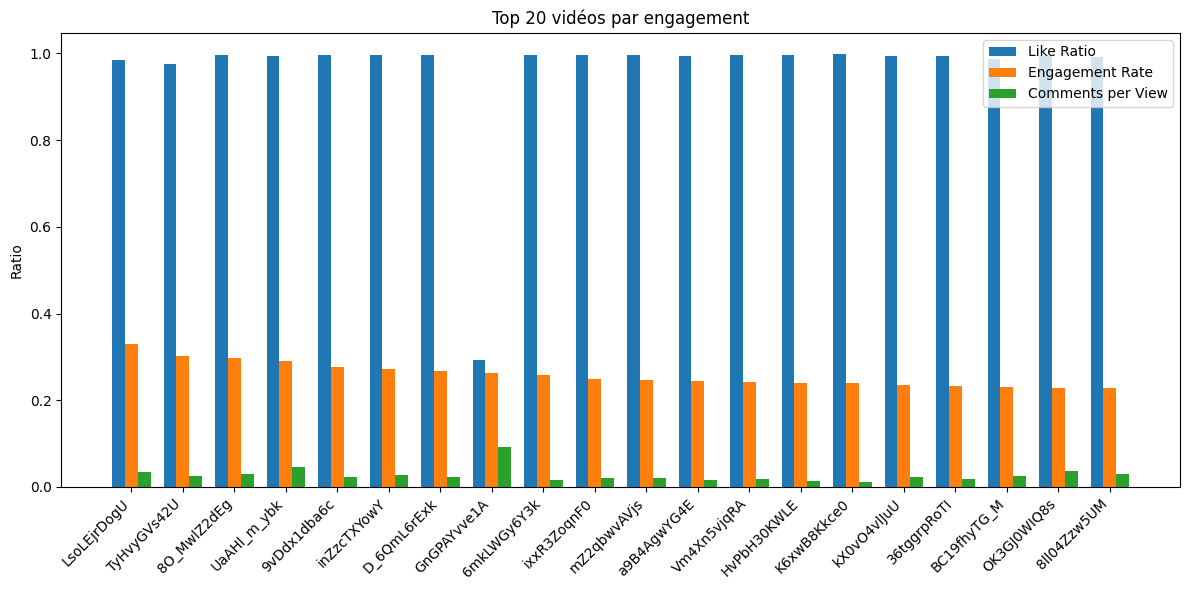

In [51]:

# Trier par engagement_rate et garder les 20 meilleures
top_videos = df_clean.sort_values('engagement_rate', ascending=False).head(20)

# Bar plot
plt.figure(figsize=(12,6))
x = np.arange(len(top_videos['video_id']))
width = 0.25

plt.bar(x - width, top_videos['like_ratio'], width, label='Like Ratio')
plt.bar(x, top_videos['engagement_rate'], width, label='Engagement Rate')
plt.bar(x + width, top_videos['comments_per_view'], width, label='Comments per View')

plt.xticks(x, top_videos['video_id'], rotation=45, ha='right')
plt.ylabel('Ratio')
plt.title('Top 20 vid√©os par engagement')
plt.legend()
plt.tight_layout()
plt.show()


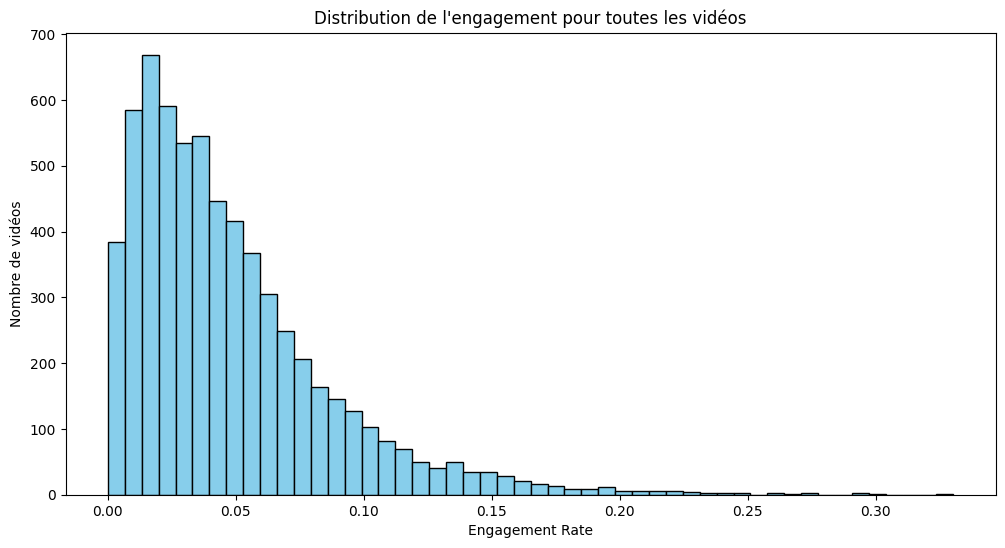

In [52]:
# Distribution g√©n√©rale avec histogrammes pour voir toutes les vid√©os
plt.figure(figsize=(12,6))
plt.hist(df_clean['engagement_rate'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Engagement Rate')
plt.ylabel('Nombre de vid√©os')
plt.title('Distribution de l\'engagement pour toutes les vid√©os')
plt.show()


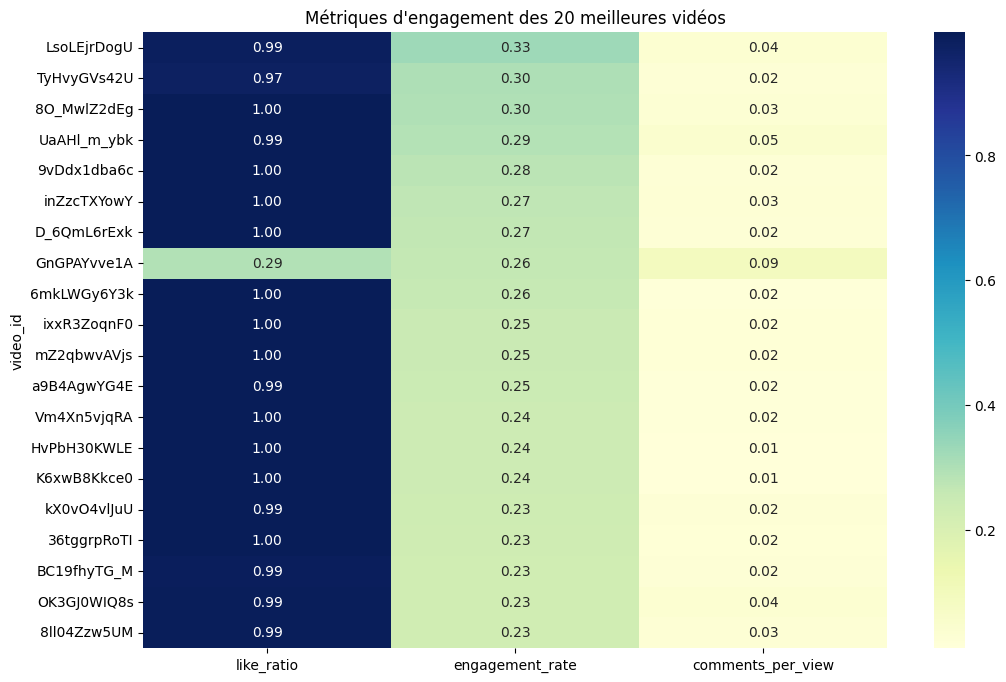

In [53]:
# Top 20 heatmap : on compare toutes les m√©triques ensemble pour les meilleures vid√©os :

top_videos_metrics = top_videos[['video_id', 'like_ratio', 'engagement_rate', 'comments_per_view']]
top_videos_metrics = top_videos_metrics.set_index('video_id')

plt.figure(figsize=(12,8))
sb.heatmap(top_videos_metrics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('M√©triques d\'engagement des 20 meilleures vid√©os')
plt.show()


**Consigne 4.2 ‚Äî Variables temporelles** : 

Elles permettent de :

Analyser la saisonnalit√© :
Quels mois ou jours g√©n√®rent le plus d‚Äôengagement ?

Analyser les tendances :
L‚Äôengagement augmente-t-il avec le temps ?
Extraire des parties du temps pour mieux comprendre le comportement des utilisateurs :Heure de publication, jour de la semaine, mois, trimestre, ann√©e,etc.

In [54]:
# VOTRE CODE ICI - Section 4.2
df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week
df_clean['publish_month'] = df_clean['publish_time'].dt.month
display(df_clean[['publish_day_of_week','publish_time']])

"""
L‚Äôid√©e, c‚Äôest de rendre l‚Äôinformation plus exploitable pour l‚Äôanalyse et la mod√©lisation.
1. Faciliter les regroupements et visualisations

Si tu veux savoir quel jour de la semaine les vid√©os sont le plus souvent publi√©es :
  Tu ne peux pas directement grouper sur une colonne publish_time (trop granulaire, chaque date est unique).
  Mais si tu cr√©es publish_day_of_week, tu peux faire un simple groupby et un barplot. 

Les algorithmes de ML ne savent pas deviner tout seuls que dans une date il y a une saisonnalit√©, des jours de la semaine, etc.
On d√©compose publish_time en features pour donner ces indices au mod√®le.

publish_hour ‚Üí capter si les vid√©os publi√©es le soir performent mieux.
publish_day_of_week ‚Üí voir si les vid√©os de tel jour attirent plus.
publish_month ‚Üí analyser la saisonnalit√©.
"""

df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week
df_clean['publish_month'] = df_clean['publish_time'].dt.month
display(df_clean[['publish_day_of_week','publish_time']])
print((df_clean['publish_month'] == 7).sum())

publish_day_of_week              publish_time
0                        0 2017-11-13 17:13:01+00:00
1                        0 2017-11-13 07:30:00+00:00
2                        6 2017-11-12 19:05:24+00:00
3                        0 2017-11-13 11:00:04+00:00
4                        6 2017-11-12 18:01:41+00:00
...                    ...                       ...
40760                    1 2018-06-12 18:55:26+00:00
40761                    2 2018-06-13 15:06:08+00:00
40762                    2 2018-06-13 05:27:27+00:00
40764                    1 2018-06-12 16:03:58+00:00
40766                    2 2018-06-13 09:00:06+00:00

[6351 rows x 2 columns]

publish_day_of_week              publish_time
0                        0 2017-11-13 17:13:01+00:00
1                        0 2017-11-13 07:30:00+00:00
2                        6 2017-11-12 19:05:24+00:00
3                        0 2017-11-13 11:00:04+00:00
4                        6 2017-11-12 18:01:41+00:00
...                    ...                       ...
40760                    1 2018-06-12 18:55:26+00:00
40761                    2 2018-06-13 15:06:08+00:00
40762                    2 2018-06-13 05:27:27+00:00
40764                    1 2018-06-12 16:03:58+00:00
40766                    2 2018-06-13 09:00:06+00:00

[6351 rows x 2 columns]

4


### Visualisation en rapport avec le temps

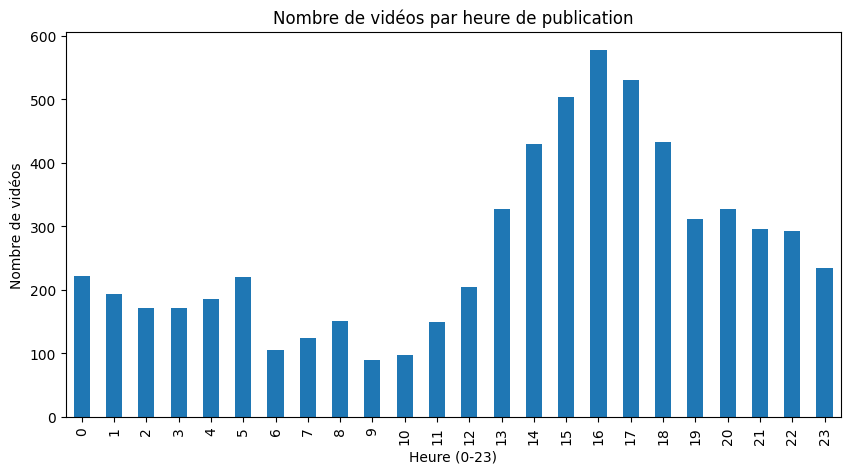

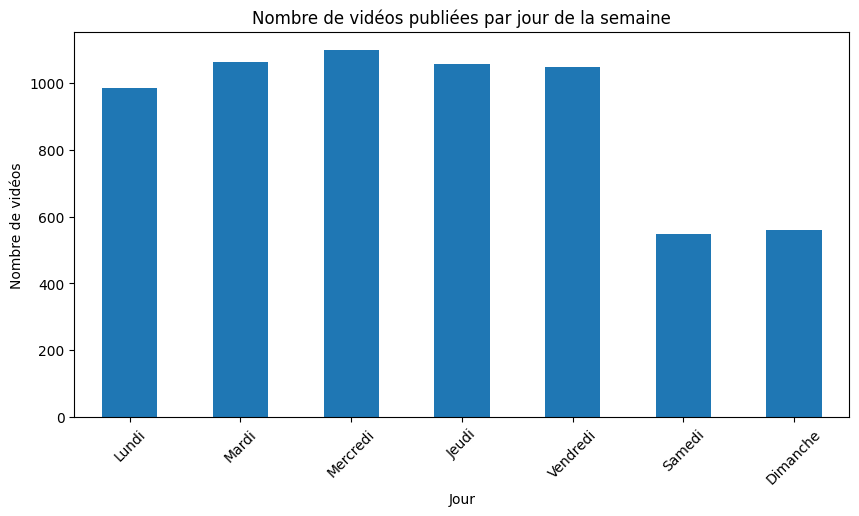

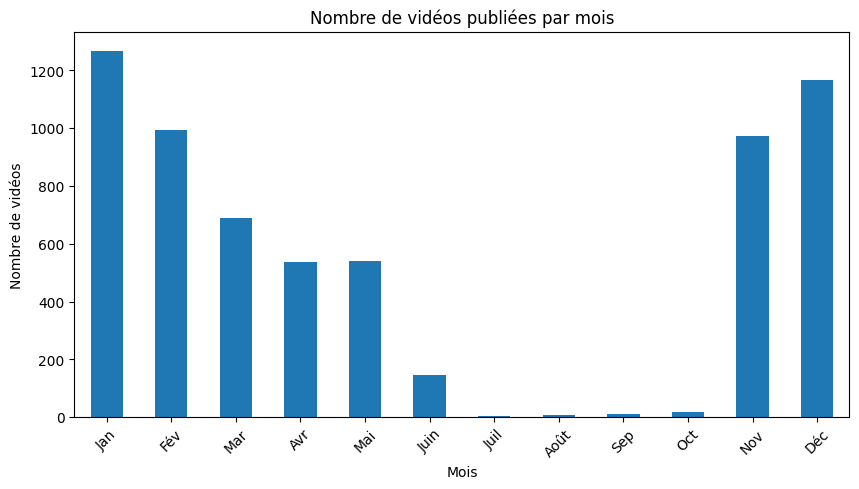

In [55]:
import matplotlib.pyplot as plt

# Histogramme : Nombre de vid√©os par heure
plt.figure(figsize=(10,5))
df_clean['publish_hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de vid√©os par heure de publication")
plt.xlabel("Heure (0-23)")
plt.ylabel("Nombre de vid√©os")
plt.show()

# Histogramme : Nombre de vid√©os par jour de la semaine
jours = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']
plt.figure(figsize=(10,5))
df_clean['publish_day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de vid√©os publi√©es par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre de vid√©os")
plt.xticks(range(7), jours, rotation=45)
plt.show()

mois = ['Jan','F√©v','Mar','Avr','Mai','Juin','Juil','Ao√ªt','Sep','Oct','Nov','D√©c']

# Comptage par mois, avec reindex pour inclure tous les mois 1 √† 12
counts = df_clean['publish_month'].value_counts().sort_index().reindex(range(1,13), fill_value=0)

plt.figure(figsize=(10,5))
counts.plot(kind='bar')
plt.title("Nombre de vid√©os publi√©es par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de vid√©os")
plt.xticks(range(12), mois, rotation=45)
plt.show()


**Consigne 4.3 ‚Äî Variables textuelles (titre)**

In [56]:
# VOTRE CODE ICI - Section 4.3
s = df_clean['title'].fillna('')  # √©vite que 'NaN' soit compt√© comme texte

# Longueur du titre (en caract√®res)
df_clean['title_length'] = s.str.len() # calcule la longueur en caract√®res de chaque titre

# Nombre de mots dans le titre
df_clean['title_word_count'] = (s.str
                    .split()           # coupe chaque titre en mots (par d√©faut sur les espaces) 
                    .str               # un ‚Äúacc√®s sp√©cial‚Äù qui te donne plein de m√©thodes de cha√Ænes de caract√®res, mais appliqu√©es √† toute la colonne d‚Äôun coup.
                    .len())            # compte combien d‚Äô√©l√©ments dans cette liste

# Pr√©sence de ¬´ beaucoup ¬ª de majuscules (plus de 3)
df_clean['has_caps'] = (s.str.contains(r'[A-Z]{3,}', regex=True) # v√©rifie si le titre contient au moins 3 lettres MAJUSCULES cons√©cutives.
                        .astype(int))                            # convertit True/False en 1/0.

# Pr√©sence de chiffres dans le titre
df_clean['has_numbers'] = (s.str.contains(r'\d', regex=True)     # v√©rifie si le titre contient des chiffres
                           .astype(int))                         # convertit True/False en 1/0.


#### Explication des features cr√©√©es : ####

title_length
‚Üí Longueur du titre en caract√®res (utile pour voir si les titres courts/longs attirent plus de vues).

title_word_count
‚Üí Nombre de mots dans le titre (ex. un titre de 10 mots contre un titre de 3 mots).

has_caps
‚Üí Variable binaire : est-ce qu‚Äôun titre contient beaucoup de majuscules ? (souvent utilis√© pour attirer l‚Äôattention : "OMG YOU WON‚ÄôT BELIEVE THIS").

has_numbers
‚Üí Variable binaire : est-ce qu‚Äôun titre contient des chiffres ? (souvent li√© √† des formats type "Top 10", "5 astuces").

## 5. Cr√©ation de la variable cible  ( Target )

**Consigne 5.1 ‚Äî D√©finition de `is_trending`**  
- Une vid√©o est *trending* si elle a plus de vues que le 80e percentile de sa cat√©gorie

In [57]:
# VOTRE CODE ICI - Section 5.1
df_clean['is_trending'] = ((df_clean.groupby('category_id')['views'] # regroupe le DataFrame par category_id. Pour chaque cat√©gorie, on prend uniquement la colonne views
                                  .transform(lambda x: x > x         # renvoie un tableau de True/False indiquant si chaque vid√©o d√©passe ce seuil.
                                  .quantile(0.8)))                   # calcule le 80·µâ percentile (le seuil de "top 20%" des vues).
                                  .astype(int))                      # convertit les bool√©ens True/False en 1 et 0.

print("Distribution de la variable cible:")
display((df_clean['is_trending']
         .value_counts()        # compte combien de vid√©os ont is_trending = 0 et combien ont is_trending = 1.
         .to_frame('count')     # transforme le r√©sultat (une Series) en tableau (DataFrame) avec une colonne nomm√©e count.
         ))

Distribution de la variable cible:


count
is_trending       
0             5078
1             1273

## 6. Pr√©paration des donn√©es pour l'entra√Ænement

**Consignes 6.1 & 6.2 ‚Äî S√©lection des features & split train/test**

In [58]:
# VOTRE CODE ICI - Section 6.1 et 6.2
# import
from sklearn.model_selection import train_test_split

# selectionne les colonnes pertinentes pour pr√©dire is_trending
features = ['views', 'likes', 'dislikes', 'comment_count',
             'like_ratio', 'engagement_rate', 'title_length', 'publish_hour', 'category_id',
             ]

X = df_clean[features].copy()         # matrice des features (X)
y = df_clean['is_trending'].copy()    # variable cible (y)

#....... Split train/test ........
X_train, X_test, y_train, y_test = train_test_split (
        X, y,
        test_size = 0.2,    # 20% test, 80% train
        random_state=42,    # pour reproductibilit√©
        stratify=y          # Conserve la m√™me proportion de trending/non-trendingDataset complet : 
                            # exemple : 
                            # Train : 80 vid√©os ‚Üí 16 trending (20%) et 64 non-trending (80%).
                            # Test : 20 vid√©os ‚Üí 4 trending (20%) et 16 non-trending (80%).
)
# ......

print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

Taille train: (5080, 9)
Taille test: (1271, 9)


### Standardisation des donn√©es

Les colonnes num√©riques (views, likes, comment_count, etc.) n‚Äôont pas la m√™me √©chelle.

Exemple :

 - views peut aller jusqu‚Äô√† plusieurs millions

 - like_ratio est entre 0 et 1

 - publish_hour va de 0 √† 23

Si on ne normalise pas, certaines variables (comme views) vont ¬´ √©craser ¬ª les autres, car elles ont des valeurs √©normes.

### scaler = StandardScaler()

On cr√©e un objet scaler, un outil qui va apprendre √† recentrer et r√©duire les donn√©es.

Concr√®tement :

il calcule la moyenne et l‚Äô√©cart-type de chaque colonne (dans num_cols) puis, il appliquera la formule :

        ùëã ùë†ùëêùëéùëôùëíùëë = (ùëã ‚àí ùúá) / ùúé o√π Œº est la moyenne et œÉ l‚Äô√©cart-type.

On entra√Æne le scaler sur le train uniquement (jamais sur le test ).

Parce qu‚Äôon doit simuler une situation r√©elle : le mod√®le ne conna√Æt pas encore les donn√©es de test.

Donc le scaler apprend uniquement √† partir de X_train.

√Ä cette √©tape, le scaler m√©morise :

 - la moyenne (Œº) de chaque colonne,

 - l‚Äô√©cart-type (œÉ) de chaque colonne.

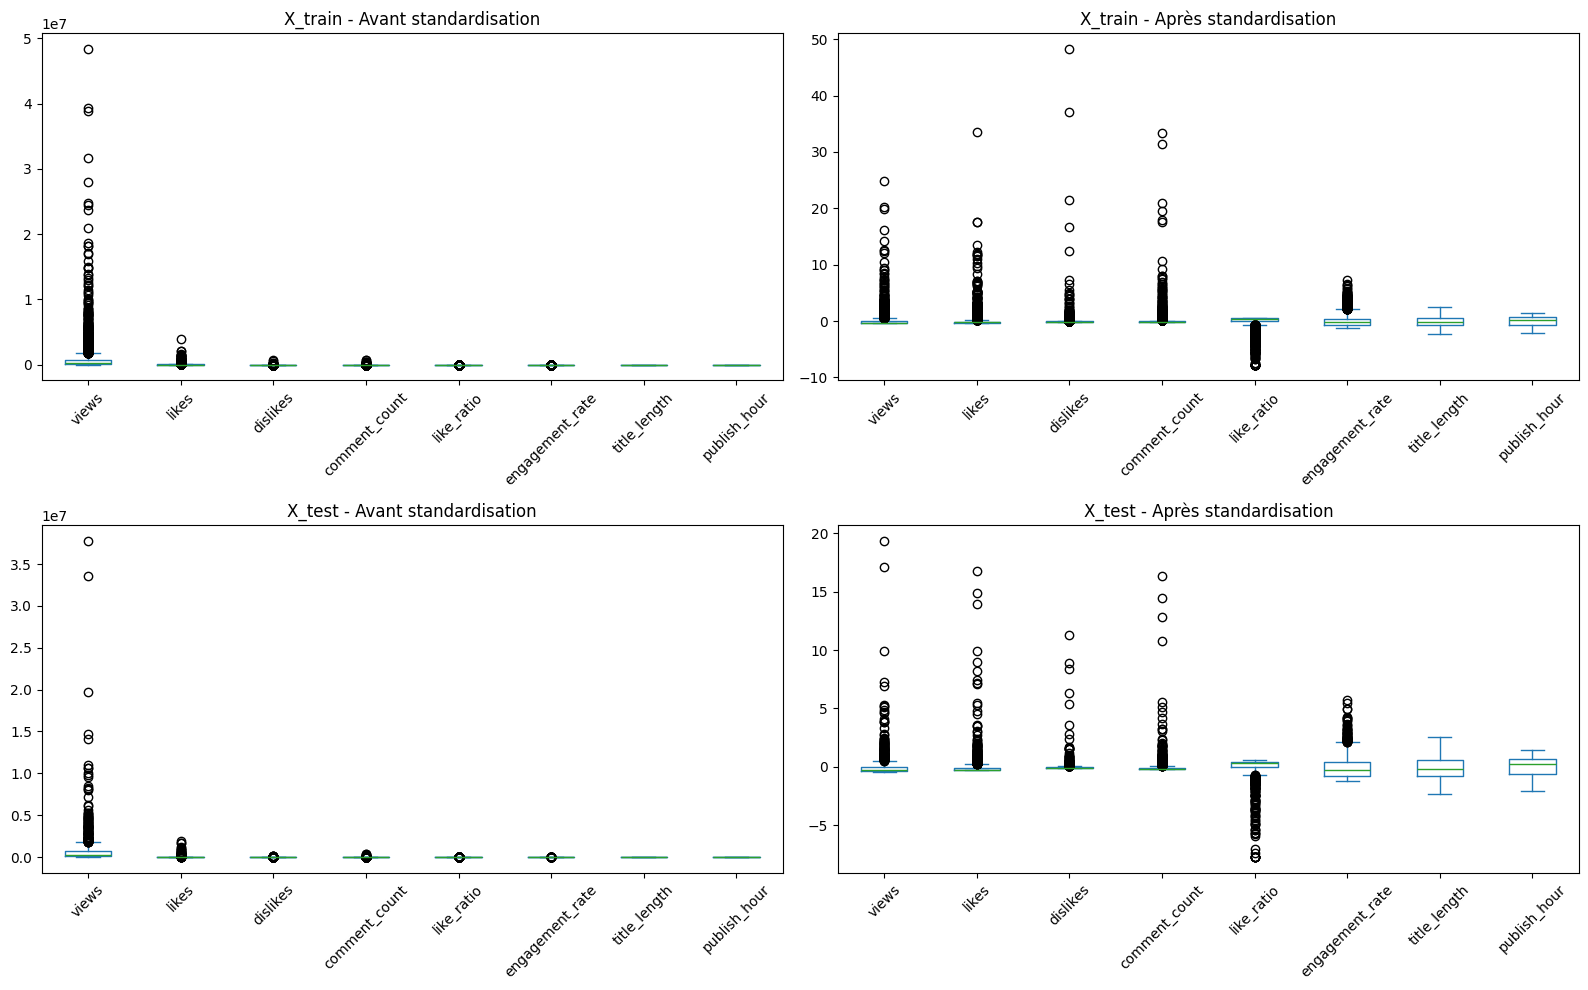

Taille train: (5080, 9)
Taille test: (1271, 9)


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Ton code de normalisation ---
scaler = StandardScaler()

num_cols = ['views', 'likes', 'dislikes', 'comment_count', 
            'like_ratio', 'engagement_rate', 'title_length', 'publish_hour']

# On garde une copie "avant" pour comparer
X_train_before = X_train[num_cols].copy()
X_test_before = X_test[num_cols].copy()

# Fit uniquement sur le train
scaler.fit(X_train[num_cols])

# Transformation
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --- VISUALISATION ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Train avant
X_train_before.plot(kind="box", ax=axes[0,0])
axes[0,0].set_title("X_train - Avant standardisation")
axes[0,0].tick_params(axis='x', rotation=45)

# Train apr√®s
X_train[num_cols].plot(kind="box", ax=axes[0,1])
axes[0,1].set_title("X_train - Apr√®s standardisation")
axes[0,1].tick_params(axis='x', rotation=45)

# Test avant
X_test_before.plot(kind="box", ax=axes[1,0])
axes[1,0].set_title("X_test - Avant standardisation")
axes[1,0].tick_params(axis='x', rotation=45)

# Test apr√®s
X_test[num_cols].plot(kind="box", ax=axes[1,1])
axes[1,1].set_title("X_test - Apr√®s standardisation")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# V√©rifie les tailles
print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")



## 7. Mod√®le 1 ‚Äî Random Forest

On a d√©ja standardis√© les donn√©es num√©riques avec StandardScaler.
√áa ram√®ne toutes les colonnes sur une m√™me √©chelle (par ex. likes ~0.5, dislikes ~-0.2).
Pourquoi ?

Les arbres en Random Forest n‚Äôen ont pas vraiment besoin (ils d√©coupent sur des seuils).

Mais on  veux comparer plus tard avec d‚Äôautres mod√®les (Logistic Regression, SVM), c‚Äôest bien d‚Äôavoir d√©j√† cette √©tape.

**Consigne 7.1 ‚Äî Entra√Ænement**

In [60]:
# VOTRE CODE ICI - Section 7.1
# Import du mod√®le Random Forest de scikit-learn
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    max_depth= 100,                 # nombre d‚Äôarbres dans la for√™t
    random_state=42,                # fixe l‚Äôal√©atoire pour avoir toujours les m√™mes r√©sultats quand on relance.
    n_jobs=-1                       # mode mode turbo, tu choisis tous les c≈ìurs du CPU √† donner √† scikit-learn
)

# Entrainement du mod√®le
rf_model.fit(X_train, y_train)

"""
Le mod√®le re√ßoit :
    X_train = les caract√©ristiques (features).
    y_train = les vraies √©tiquettes (0 ou 1).

La for√™t construit 100 arbres de d√©cision (par d√©faut).

Chaque arbre apprend √† s√©parer les vid√©os trending des non-trending avec des r√®gles simples comme :
    "Si views > 10000 et like_ratio > 0.8 ‚Üí trending"
    "Sinon, si comment_count < 50 ‚Üí pas trending"

Puis la for√™t combine les votes de tous les arbres ‚Üí la majorit√© gagne.
""" 
# Pr√©dire sur le jeu de test
y_predictions = rf_model.predict(X_test)


**Consigne 7.2 ‚Äî √âvaluation**

### Accuracy: proportion de pr√©dictions correctes.

Formule :
Accuracy = ùëárueùëÉositif + ùëárueùëÅ√©gatif / ùëáùëÉ + ùëáùëÅ + ùêπalseùëÉositif + ùêπalseùëÅ√©gatif	‚Äã

Interpr√©tation : sur 100 vid√©os, combien le mod√®le a bien class√©es (trending ou non-trending).

Limite : si tes classes sont d√©s√©quilibr√©es (ex. 90% de vid√©os non-trending), le mod√®le peut avoir une bonne accuracy m√™me en pr√©disant tout le temps ‚Äúnon-trending‚Äù.

### Precision score : parmi toutes les vid√©os que le mod√®le pr√©dit ‚Äútrending‚Äù, combien le sont vraiment ?

Formule :
Precision = ùëáùëÉ / ùëáùëÉ + ùêπùëÉ

Interpr√©tation : ‚ÄúQuand mon mod√®le dit trending, est-ce qu‚Äôil a raison ?‚Äù

Utile quand les faux positifs co√ªtent cher (ex. tu veux √™tre s√ªr avant de pousser une vid√©o comme ‚Äútendance‚Äù).

### Recall : parmis toutes les vraies vid√©os ‚Äútrending‚Äù, combien le mod√®le a bien d√©tect√©es ?

Formule :
Rappel = ùëáùëÉ / ùëáùëÉ + ùêπùëÅ

Interpr√©tation : ‚ÄúEst-ce que je loupe beaucoup de vraies vid√©os trending ?‚Äù

Utile quand les faux n√©gatifs co√ªtent cher (ex. ne pas rater une vid√©o qui aurait d√ª √™tre dans les tendances).

### F1 score : moyenne harmonique de la pr√©cision et du rappel.

Formule :

ùêπ1 = 2 √ó ( Precision √ó Rappel / Precision + Rappel)

Interpr√©tation : √©quilibre entre pr√©cision et rappel.

Utile quand tu veux un compromis entre ne pas avoir trop de faux positifs et ne pas rater trop de vrais trending.

Random Forest - R√©sultats:
Accuracy : 0.9717
Precision: 0.9582
Recall   : 0.8980
F1-Score : 0.9271


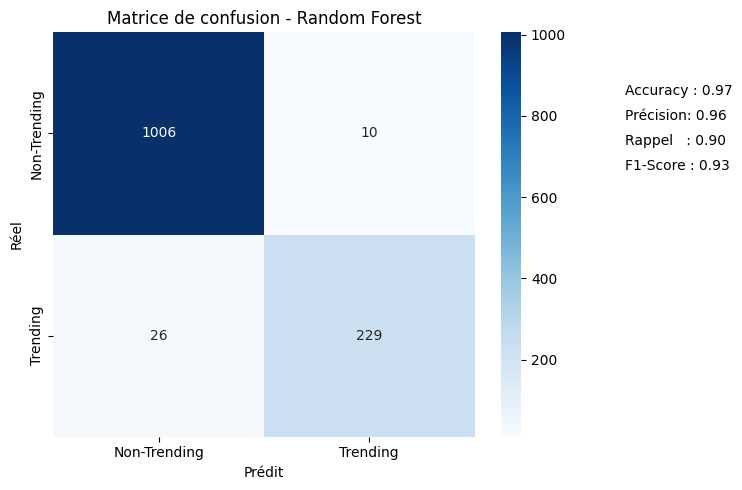

In [61]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# --- Scores ---
acc = accuracy_score(y_test, y_predictions)
prec = precision_score(y_test, y_predictions)
rec = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)

print("Random Forest - R√©sultats:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_predictions)

plt.figure(figsize=(6,5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Trending", "Trending"],
            yticklabels=["Non-Trending", "Trending"])

plt.xlabel("Pr√©dit")
plt.ylabel("R√©el")
plt.title("Matrice de confusion - Random Forest")

# --- Ajouter les scores dans la figure ---
plt.figtext(1.05, 0.8, f"Accuracy : {acc:.2f}", fontsize=10)
plt.figtext(1.05, 0.75, f"Pr√©cision: {prec:.2f}", fontsize=10)
plt.figtext(1.05, 0.70, f"Rappel   : {rec:.2f}", fontsize=10)
plt.figtext(1.05, 0.65, f"F1-Score : {f1:.2f}", fontsize=10)

plt.tight_layout()
plt.show()


Une grille 2x2 (matrice de confusion) avec les nombres :

en haut √† gauche : TN

en haut √† droite : FP

en bas √† gauche : FN

en bas √† droite : TP

√Ä droite de la grille, les scores (accuracy, precision, recall, F1) bien affich√©s.

### ***l‚Äôimportance des variables ?***

Chaque arbre de la for√™t prend des d√©cisions bas√©es sur certaines colonnes.

La for√™t peut calculer quelle colonne contribue le plus √† la pr√©diction.

Cela permet de :

 - comprendre le mod√®le (‚Äúquelles features influencent le plus la trending ?‚Äù)

 - r√©duire le nombre de colonnes si certaines sont peu importantes

 - expliquer le mod√®le √† d‚Äôautres personnes

In [62]:
# # Importance des variables
feature_importance = (pd.DataFrame({                 # on met les deux listes (features et importances) dans un tableau facile √† lire.
     'feature': X.columns,                           # X = df_clean[features].copy() # matrice des features (X) : colonnes choisis pr√©c√©dements
     'importance': rf_model.feature_importances_})   # feature_importances_ est un array numpy qui contient l‚Äôimportance de chaque feature utilis√©e par le mod√®le.
                #array avec un score pour chaque feature : 
                # plus la valeur est √©lev√©e ‚Üí plus la colonne a √©t√© utilis√©e pour prendre des d√©cisions importantes dans la for√™t.
                #Les valeurs sont normalis√©es : la somme = 1.
.sort_values('importance', ascending=False))   # trie du plus important au moins important.

print("\nTop 10 variables importantes:")
display(feature_importance.head(10))


Top 10 variables importantes:


feature  importance
0            views    0.489141
2         dislikes    0.135988
1            likes    0.110925
3    comment_count    0.080337
8      category_id    0.080145
5  engagement_rate    0.051447
4       like_ratio    0.021603
7     publish_hour    0.015366
6     title_length    0.015047

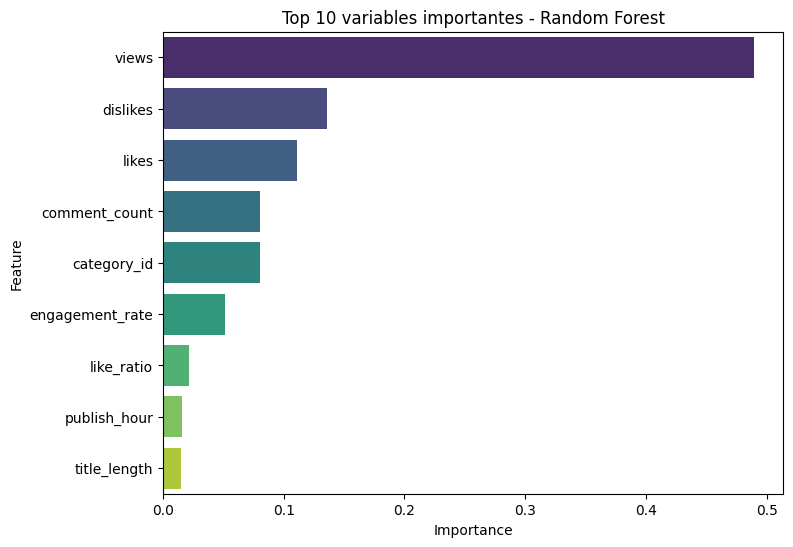

In [63]:
# Visualisation de l'importance des features


plt.figure(figsize=(8,6))
sb.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 variables importantes - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Test avec d'autres features

In [64]:
from sklearn.model_selection import train_test_split

# --- S√©lection des colonnes utiles (features) ---
others_features = [
    'views', 'likes', 'comment_count', 'engagement_rate',  # colonnes num√©riques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month',         # temporelles
    'category_id'  # cat√©gorielle
   
]

X = df_clean[others_features].copy()         # matrice des features (X)
y = df_clean['is_trending'].copy()    # variable cible (y)

# --- Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% test, 80% train
    random_state=42,    # pour reproductibilit√©
    stratify=y          # conserve la m√™me proportion de trending/non-trending
)

print("Taille train :", X_train.shape)
print("Taille test  :", X_test.shape)


Taille train : (5080, 12)
Taille test  : (1271, 12)


**Standardisation des donn√©es (StandardScaler)** 

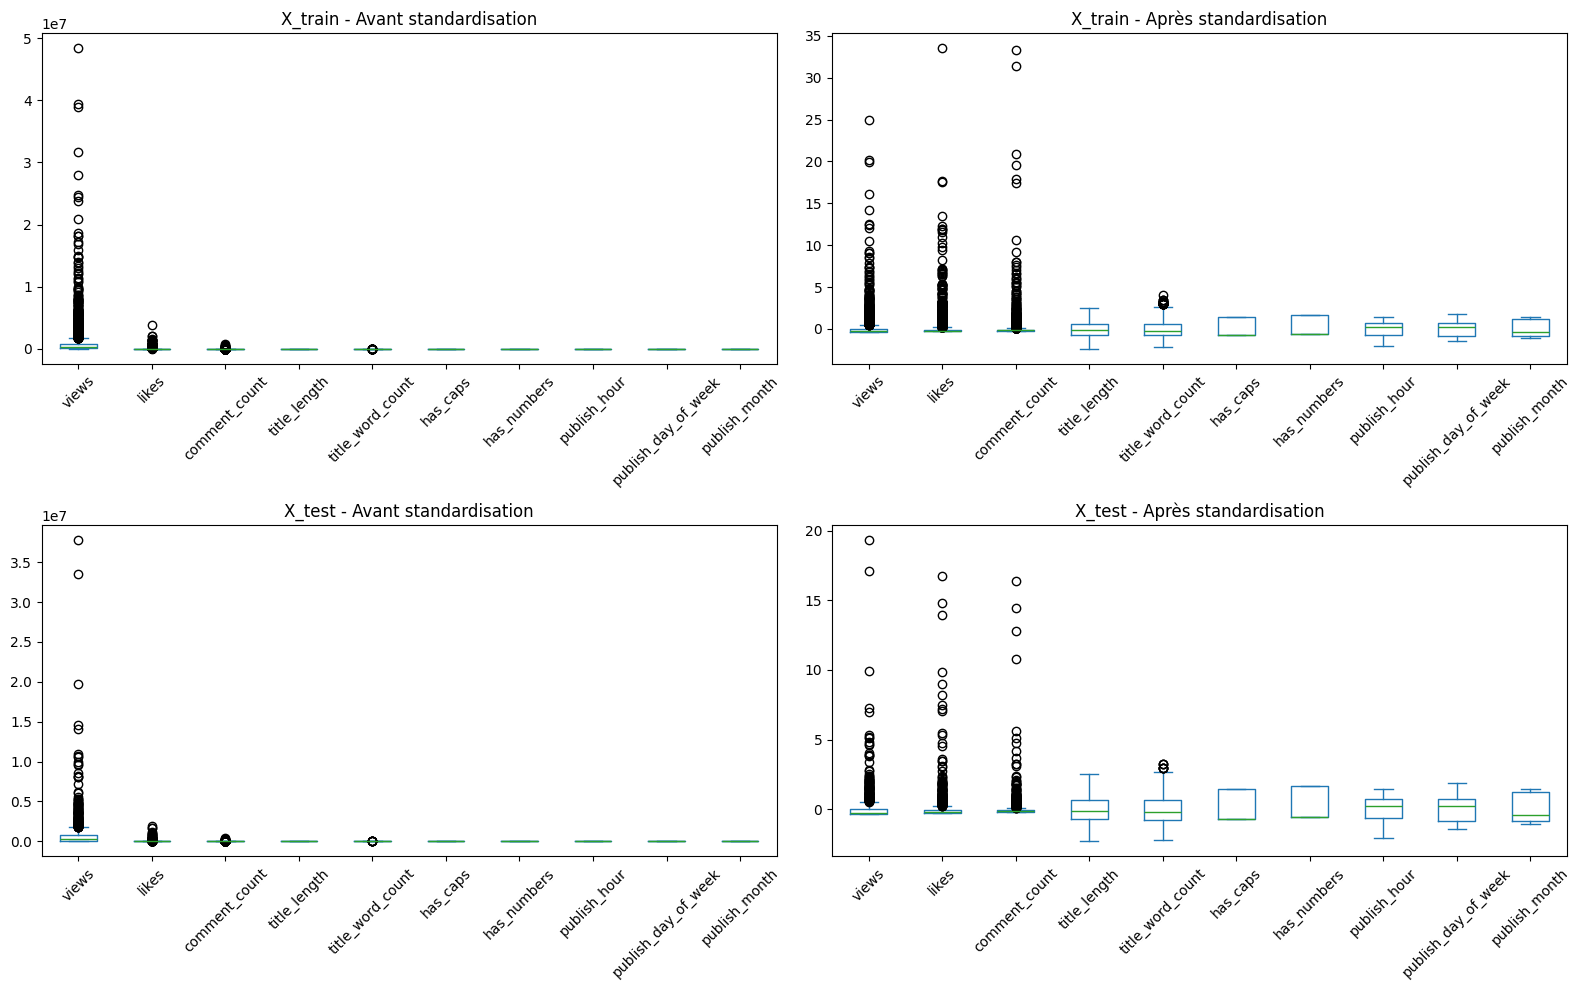

Taille train: (5080, 12)
Taille test: (1271, 12)


In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Ton code de normalisation ---
scaler = StandardScaler()

num_cols = [ 'views', 'likes', 'comment_count',   # colonnes num√©riques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month']         # temporelle

# On garde une copie "avant" pour comparer
X_train_before = X_train[num_cols].copy()
X_test_before = X_test[num_cols].copy()

# Fit uniquement sur le train
scaler.fit(X_train[num_cols])

# Transformation
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --- VISUALISATION ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Train avant
X_train_before.plot(kind="box", ax=axes[0,0])
axes[0,0].set_title("X_train - Avant standardisation")
axes[0,0].tick_params(axis='x', rotation=45)

# Train apr√®s
X_train[num_cols].plot(kind="box", ax=axes[0,1])
axes[0,1].set_title("X_train - Apr√®s standardisation")
axes[0,1].tick_params(axis='x', rotation=45)

# Test avant
X_test_before.plot(kind="box", ax=axes[1,0])
axes[1,0].set_title("X_test - Avant standardisation")
axes[1,0].tick_params(axis='x', rotation=45)

# Test apr√®s
X_test[num_cols].plot(kind="box", ax=axes[1,1])
axes[1,1].set_title("X_test - Apr√®s standardisation")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# V√©rifie les tailles
print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")



## Entrainement Mod√®le Random Forest avec d'autres features

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    max_depth= 100,                 # nombre d‚Äôarbres dans la for√™t
    random_state=42,                # fixe l‚Äôal√©atoire pour avoir toujours les m√™mes r√©sultats quand on relance.
    n_jobs=-1                       # mode mode turbo, tu choisis tous les c≈ìurs du CPU √† donner √† scikit-learn
)

# Entrainement du mod√®le
rf_model.fit(X_train, y_train)

"""
Le mod√®le re√ßoit :
    X_train = les caract√©ristiques (features).
    y_train = les vraies √©tiquettes (0 ou 1).

La for√™t construit 100 arbres de d√©cision (par d√©faut).

Chaque arbre apprend √† s√©parer les vid√©os trending des non-trending avec des r√®gles simples comme :
    "Si views > 10000 et like_ratio > 0.8 ‚Üí trending"
    "Sinon, si comment_count < 50 ‚Üí pas trending"

Puis la for√™t combine les votes de tous les arbres ‚Üí la majorit√© gagne.
""" 
# Pr√©dire sur le jeu de test
y_predictions = rf_model.predict(X_test)

**√âvaluation avec d'autres features**

Random Forest - R√©sultats:
Accuracy : 0.9685
Precision: 0.9498
Recall   : 0.8902
F1-Score : 0.9190


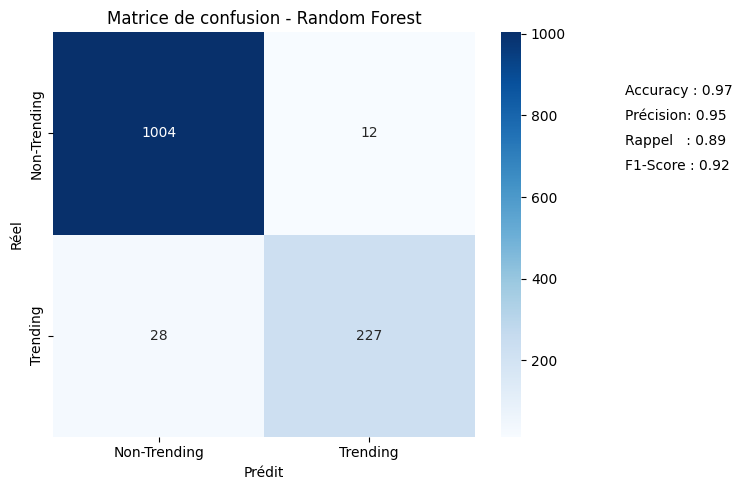

In [67]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# --- Scores ---
acc = accuracy_score(y_test, y_predictions)
prec = precision_score(y_test, y_predictions)
rec = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)

print("Random Forest - R√©sultats:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_predictions)

plt.figure(figsize=(6,5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Trending", "Trending"],
            yticklabels=["Non-Trending", "Trending"])

plt.xlabel("Pr√©dit")
plt.ylabel("R√©el")
plt.title("Matrice de confusion - Random Forest")

# --- Ajouter les scores dans la figure ---
plt.figtext(1.05, 0.8, f"Accuracy : {acc:.2f}", fontsize=10)
plt.figtext(1.05, 0.75, f"Pr√©cision: {prec:.2f}", fontsize=10)
plt.figtext(1.05, 0.70, f"Rappel   : {rec:.2f}", fontsize=10)
plt.figtext(1.05, 0.65, f"F1-Score : {f1:.2f}", fontsize=10)

plt.tight_layout()
plt.show()

### L'importance des features

In [68]:
# # Importance des variables
feature_importance = (pd.DataFrame({                 # on met les deux listes (features et importances) dans un tableau facile √† lire.
     'feature': X.columns,                           # X = df_clean[features].copy() # matrice des features (X) : colonnes choisis pr√©c√©dements
     'importance': rf_model.feature_importances_})   # feature_importances_ est un array numpy qui contient l‚Äôimportance de chaque feature utilis√©e par le mod√®le.
                #array avec un score pour chaque feature : 
                # plus la valeur est √©lev√©e ‚Üí plus la colonne a √©t√© utilis√©e pour prendre des d√©cisions importantes dans la for√™t.
                #Les valeurs sont normalis√©es : la somme = 1.
.sort_values('importance', ascending=False))   # trie du plus important au moins important.

print("\nTop 10 variables importantes:")
display(feature_importance.head(10))


Top 10 variables importantes:


feature  importance
0                 views    0.472100
1                 likes    0.178686
2         comment_count    0.136213
3       engagement_rate    0.067446
11          category_id    0.063172
4          title_length    0.018623
8          publish_hour    0.018006
10        publish_month    0.014789
5      title_word_count    0.012778
9   publish_day_of_week    0.011764

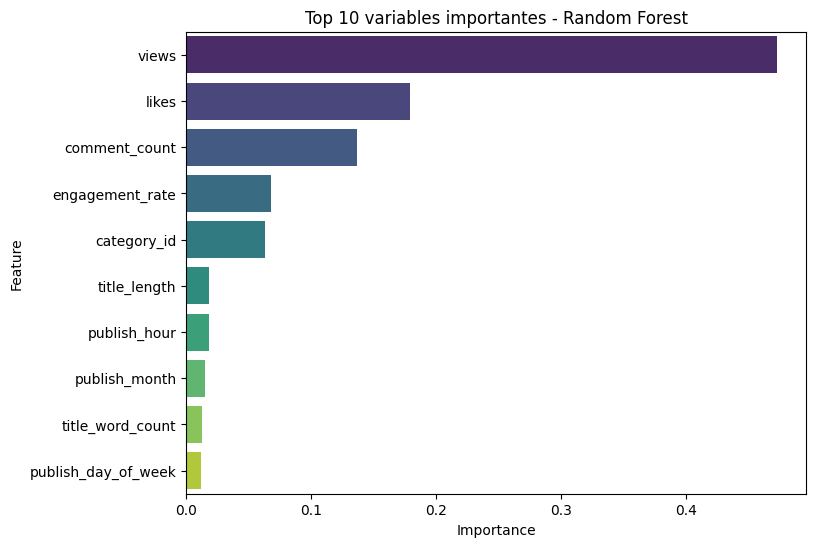

In [69]:
# Visualisation de l'importance des features


plt.figure(figsize=(8,6))
sb.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 variables importantes - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 8. Mod√®le 2 ‚Äî Support Vector Machine (SVM)

**Consigne 8.1 ‚Äî Entra√Ænement mod√®le SVM Kernel linear (utilisant donn√©es standardis√©s)**

In [70]:
from sklearn.svm import SVC

# Cr√©er le mod√®le
svm_model = SVC(
    kernel="linear",    # type de noyau
    C= 1,               # param√®tre de r√©gularisation
    gamma="scale",     # influence d'un point (automatique par d√©faut)
    random_state=42
)

# Entra√Æner sur les donn√©es
svm_model.fit(X_train, y_train)

# Pr√©dire sur les donn√©es de test
y_pred = svm_model.predict(X_test)

**Consigne 8.2 ‚Äî √âvaluation**

SVM - R√©sultats:
Accuracy : 0.94
Pr√©cision: 0.93
Rappel   : 0.78
F1-Score : 0.85


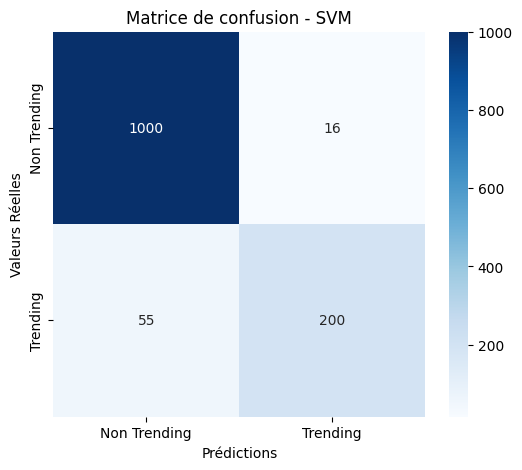

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score

# --- √âvaluation ---
print("SVM - R√©sultats:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Pr√©cision: {precision_score(y_test, y_pred):.2f}")
print(f"Rappel   : {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.2f}")

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_pred)

# --- Graphique ---
plt.figure(figsize=(6,5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non Trending", "Trending"],
            yticklabels=["Non Trending", "Trending"])
plt.xlabel("Pr√©dictions")
plt.ylabel("Valeurs R√©elles")
plt.title("Matrice de confusion - SVM")
plt.show()

# SVM -Linear - R√©sultats:
# Accuracy : 0.94
# Pr√©cision: 0.93
# Rappel   : 0.78
# F1-Score : 0.85

### Comparaison des hyperparam√®tres

In [72]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. D√©finir le mod√®le de base
svm = SVC(random_state=42)

# 2. D√©finir la grille d'hyperparam√®tres
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf'], # on choisit le noyau
    'gamma': ['scale', 0.1, 1]
}

# 3. D√©finir les m√©triques
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Lancer GridSearchCV
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',     # crit√®re pour choisir le "meilleur mod√®le"
    cv=5,
    n_jobs=-1
)

# 5. Entra√Ænement
grid.fit(X_train, y_train)

# 6. Afficher les meilleurs param√®tres
print("Meilleurs param√®tres :", grid.best_params_)
print("Meilleur score F1 (moyenne CV) :", grid.best_score_)

# 7. Meilleur mod√®le entra√Æn√©
best_svm = grid.best_estimator_

# 8. √âvaluer sur le jeu de test
y_pred = best_svm.predict(X_test)
print("\n--- √âvaluation sur le jeu de test ---")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Pr√©cision: {precision_score(y_test, y_pred):.4f}")
print(f"Rappel   : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")

# 9. Mettre les r√©sultats de la cross-validation dans un DataFrame pandas
results_df = pd.DataFrame(grid.cv_results_)

# S√©lectionner et renommer les colonnes utiles
results_df = results_df[
    ['param_C', 'param_kernel', 'param_gamma',
     'mean_test_accuracy', 'mean_test_precision',
     'mean_test_recall', 'mean_test_f1']
].sort_values(by='mean_test_f1', ascending=False)

print("\n--- R√©sultats complets (moyenne sur CV) ---")
print(results_df)

# (Optionnel) Affichage plus joli avec un arrondi
print("\n--- R√©sultats arrondis ---")
print(results_df.round(4))



Meilleurs param√®tres : {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleur score F1 (moyenne CV) : 0.8751582590495486

--- √âvaluation sur le jeu de test ---
Accuracy : 0.9441
Pr√©cision: 0.9259
Rappel   : 0.7843
F1-Score : 0.8493

--- R√©sultats complets (moyenne sur CV) ---
    param_C param_kernel param_gamma  mean_test_accuracy  mean_test_precision  \
6       1.0       linear       scale            0.953150             0.938497   
8       1.0       linear         0.1            0.953150             0.938497   
10      1.0       linear           1            0.953150             0.938497   
16     10.0       linear           1            0.952362             0.929296   
14     10.0       linear         0.1            0.952362             0.929296   
12     10.0       linear       scale            0.952362             0.929296   
15     10.0          rbf         0.1            0.951378             0.920508   
0       0.1       linear       scale            0.950984             0

**Consigne 8.1 ‚Äî Entra√Ænement (utiliser donn√©es normalis√©es pour RBF et polynomial)**

***Normalisation***

In [73]:
from sklearn.model_selection import train_test_split

# --- S√©lection des colonnes utiles (features) ---
normalize_features = [
    'views', 'likes', 'comment_count', 'engagement_rate',  # colonnes num√©riques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month',         # temporelles
    'category_id'  # cat√©gorielle
   
]

X = df_clean[normalize_features].copy()         # matrice des features (X)
y = df_clean['is_trending'].copy()    # variable cible (y)

# --- Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% test, 80% train
    random_state=42,    # pour reproductibilit√©
    stratify=y          # conserve la m√™me proportion de trending/non-trending
)

print("Taille train :", X_train.shape)
print("Taille test  :", X_test.shape)

Taille train : (5080, 12)
Taille test  : (1271, 12)


***Visualisation des donn√©es normalis√©es***

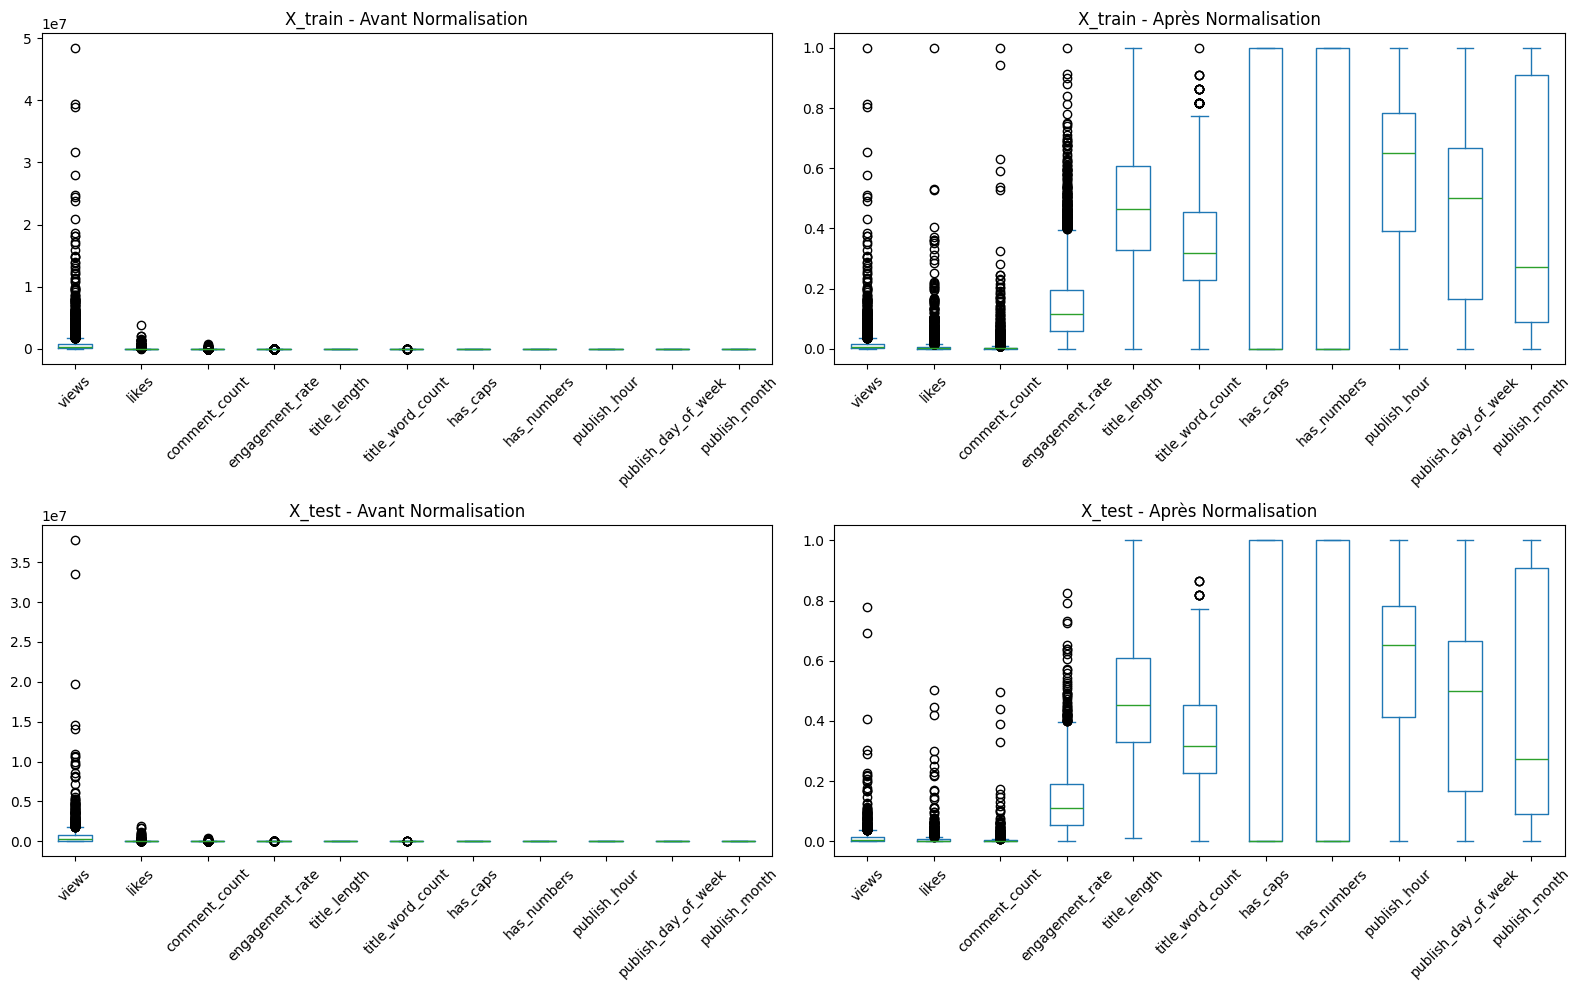

Taille train: (5080, 12)
Taille test: (1271, 12)


In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Ton code de normalisation ---
scaler = MinMaxScaler()

num_cols = [ 'views', 'likes', 'comment_count','engagement_rate',   # colonnes num√©riques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month']         # temporelle

# On garde une copie "avant" pour comparer
X_train_before = X_train[num_cols].copy()
X_test_before = X_test[num_cols].copy()

# Fit uniquement sur le train
scaler.fit(X_train[num_cols])

# Transformation
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --- VISUALISATION ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Train avant
X_train_before.plot(kind="box", ax=axes[0,0])
axes[0,0].set_title("X_train - Avant Normalisation")
axes[0,0].tick_params(axis='x', rotation=45)

# Train apr√®s
X_train[num_cols].plot(kind="box", ax=axes[0,1])
axes[0,1].set_title("X_train - Apr√®s Normalisation")
axes[0,1].tick_params(axis='x', rotation=45)

# Test avant
X_test_before.plot(kind="box", ax=axes[1,0])
axes[1,0].set_title("X_test - Avant Normalisation")
axes[1,0].tick_params(axis='x', rotation=45)

# Test apr√®s
X_test[num_cols].plot(kind="box", ax=axes[1,1])
axes[1,1].set_title("X_test - Apr√®s Normalisation")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# V√©rifie les tailles
print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")



**Consigne 8.1 ‚Äî Entra√Ænement mod√®le SVM Kernel poly (utilisant donn√©es standardis√©s)**

In [75]:
svm_model = SVC(
    kernel='linear', #noyau
    C=10
)

svm_model.fit(X_train, y_train)

y_predict = svm_model.predict(X_test)

**Consigne 8.2 ‚Äî √âvaluation**

SVM - R√©sultats:
Accuracy : 0.94
Pr√©cision: 0.93
Rappel   : 0.78
F1-Score : 0.85


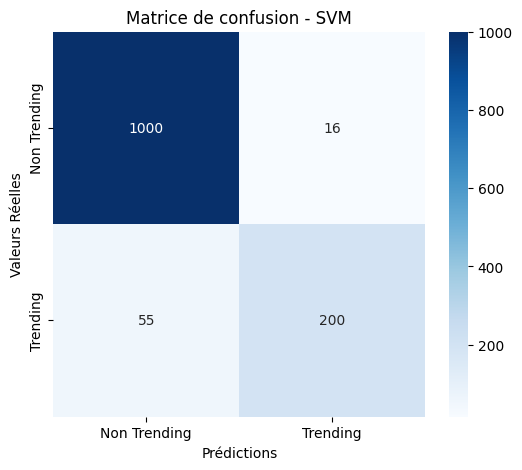

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score

# --- √âvaluation ---
print("SVM - R√©sultats:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Pr√©cision: {precision_score(y_test, y_pred):.2f}")
print(f"Rappel   : {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.2f}")

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_pred)

# --- Graphique ---
plt.figure(figsize=(6,5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non Trending", "Trending"],
            yticklabels=["Non Trending", "Trending"])
plt.xlabel("Pr√©dictions")
plt.ylabel("Valeurs R√©elles")
plt.title("Matrice de confusion - SVM")
plt.show()

#SVM -Poly standardis√© R√©sultats: 
#Accuracy : 0.94
#Pr√©cision: 0.93
#Rappel   : 0.78
#F1-Score : 0.85                

# SVM -Linear standardis√© - R√©sultats:
# Accuracy : 0.94
# Pr√©cision: 0.93
# Rappel   : 0.78
# F1-Score : 0.85

# SVM - Linear normaliis√©- C=1.0 R√©sultats:
# Accuracy : 0.94
# Pr√©cision: 0.93
# Rappel   : 0.78
# F1-Score : 0.85

# SVM -Linear normaliis√©- C=10 R√©sultats:
# Accuracy : 0.93
# Pr√©cision: 0.97
# Rappel   : 0.65
# F1-Score : 0.78

# SVM - rbf normalis√© - R√©sultats:
# Accuracy : 0.93
# Pr√©cision: 0.97
# Rappel   : 0.65
# F1-Score : 0.78


### Comparaison des hyperparametres

In [77]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. D√©finir le mod√®le de base
svm = SVC(random_state=42)

# 2. D√©finir la grille d'hyperparam√®tres
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf'], # on choisit le noyau
    'gamma': ['scale', 0.1, 1]
}

# 3. D√©finir les m√©triques
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Lancer GridSearchCV
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',     # crit√®re pour choisir le "meilleur mod√®le"
    cv=5,
    n_jobs=-1
)

# 5. Entra√Ænement
grid.fit(X_train, y_train)

# 6. Afficher les meilleurs param√®tres
print("Meilleurs param√®tres :", grid.best_params_)
print("Meilleur score F1 (moyenne CV) :", grid.best_score_)

# 7. Meilleur mod√®le entra√Æn√©
best_svm = grid.best_estimator_

# 8. √âvaluer sur le jeu de test
y_pred = best_svm.predict(X_test)
print("\n--- √âvaluation sur le jeu de test ---")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Pr√©cision: {precision_score(y_test, y_pred):.4f}")
print(f"Rappel   : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")

# 9. Mettre les r√©sultats de la cross-validation dans un DataFrame pandas
results_df = pd.DataFrame(grid.cv_results_)

# S√©lectionner et renommer les colonnes utiles
results_df = results_df[
    ['param_C', 'param_kernel', 'param_gamma',
     'mean_test_accuracy', 'mean_test_precision',
     'mean_test_recall', 'mean_test_f1']
].sort_values(by='mean_test_f1', ascending=False)

print("\n--- R√©sultats complets (moyenne sur CV) ---")
print(results_df)

# (Optionnel) Affichage plus joli avec un arrondi
print("\n--- R√©sultats arrondis ---")
print(results_df.round(4))

# Meilleurs param√®tres : {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
# Meilleur score F1 (moyenne CV) : 0.8033002461447841

# --- √âvaluation sur le jeu de test ---
# Accuracy : 0.9253
# Pr√©cision: 0.9706
# Rappel   : 0.6471
# F1-Score : 0.7765

# Meilleurs param√®tres : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
# Meilleur score F1 (moyenne CV) : 0.531252155150564

# --- √âvaluation sur le jeu de test ---
# Accuracy : 0.8552
# Pr√©cision: 0.7934
# Rappel   : 0.3765
# F1-Score : 0.5106




Meilleurs param√®tres : {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Meilleur score F1 (moyenne CV) : 0.8033002461447841

--- √âvaluation sur le jeu de test ---
Accuracy : 0.9253
Pr√©cision: 0.9706
Rappel   : 0.6471
F1-Score : 0.7765

--- R√©sultats complets (moyenne sur CV) ---
    param_C param_kernel param_gamma  mean_test_accuracy  mean_test_precision  \
16     10.0       linear           1            0.933661             0.985874   
14     10.0       linear         0.1            0.933661             0.985874   
12     10.0       linear       scale            0.933661             0.985874   
17     10.0          rbf           1            0.858465             0.788534   
8       1.0       linear         0.1            0.855118             1.000000   
6       1.0       linear       scale            0.855118             1.000000   
10      1.0       linear           1            0.855118             1.000000   
15     10.0          rbf         0.1            0.838189             

## 1Ô∏è‚É£ Kernel lin√©aire (kernel='linear')

Imagine que tu traces une ligne droite pour s√©parer tes donn√©es.

Quand l‚Äôutiliser :
Si tes donn√©es peuvent √™tre s√©par√©es √† peu pr√®s par une ligne droite (ou un plan pour plusieurs dimensions).

Avantages :

- Rapide √† calculer.

- Peu de r√©glages √† faire.

- Moins de risque de ¬´ surapprendre ¬ª sur tes donn√©es (plus stable).

Inconv√©nients :

- Si la relation entre tes donn√©es et la cible est courb√©e ou complexe, il ne pourra pas bien s‚Äôadapter.

## 2Ô∏è‚É£ Kernel RBF (kernel='rbf')

Imagine que tu utilises un √©lastique pour entourer des points : il peut se plier et suivre les formes complexes de tes donn√©es.

Quand l‚Äôutiliser :
- Si tes donn√©es ont des formes non lin√©aires, que la s√©paration n‚Äôest pas une simple ligne.

Avantages :

- Tr√®s flexible : peut s‚Äôadapter √† presque toutes les formes.

- Peut am√©liorer beaucoup les performances si la relation est compliqu√©e.

Inconv√©nients :

- Plus lent √† calculer.

- Plus sensible aux r√©glages (C et gamma).

- Peut ¬´ surapprendre ¬ª si mal r√©gl√© (le mod√®le colle trop aux donn√©es d‚Äôentra√Ænement).

## 3Ô∏è‚É£ Kernel polynomial (kernel='poly')

Imagine que tu dessines une courbe simple (parabolique, cubique, etc.) pour s√©parer les points.

Quand l‚Äôutiliser :
- Si tu penses que la relation suit une formule polynomiale (ex : carr√© ou cube des valeurs).

Avantages :

- Capture des relations un peu plus complexes que lin√©aire, mais pas trop.

- Moins flexible que RBF, plus flexible que lin√©aire.

Inconv√©nients :

- Si le degr√© du polyn√¥me est trop √©lev√©, √ßa devient instable et lent.

- Moins utilis√© que RBF en pratique.

### Conclusion 

 Les performances ne changent pas entre donn√©es standardis√©es et normalis√©es pour un kernel lin√©aire.

 Pour ce dataset, pas besoin de kernels non lin√©aires (poly ou rbf), car ils n‚Äôam√©liorent pas les scores et prennent beaucoup plus de temps.

 C=10 offre un bon compromis entre pr√©cision et r√©gularisation.

## 9. Mod√®le 3 ‚Äî Gradient Boosting (XGBoost)

**Installation de la librairie XGBoost**

In [78]:
!pip install xgboost


**Consigne 9.1 ‚Äî Entra√Ænement**

In [79]:
# VOTRE CODE ICI - Section 9.1

try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state=42, n_jobs=-1, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
except ImportError:
    print("XGBoost n'est pas install√©. Installez avec: pip install xgboost")
    xgb_model = None
    xgb_predictions = None

**Les hyperparam√®tres principaux :**

Il y en a beaucoup, mais voici les plus importants 

n_estimators :

- Nombre d‚Äôarbres.

- Plus grand = meilleur, mais risque d‚Äôoverfitting et plus lent.

max_depth :

- Profondeur max des arbres.

- Grand = plus complexe, petit = plus simple.

learning_rate (Œ∑) :

- Poids donn√© √† chaque nouvel arbre.

- Petit = plus lent mais plus pr√©cis.

subsample :

- Proportion d‚Äô√©chantillons utilis√©s par arbre (ex: 0.8 = 80%).

- Introduit du hasard pour √©viter le surapprentissage.

colsample_bytree :

- Proportion de features utilis√©es par arbre.

- Comme dans Random Forest ‚Üí plus de diversit√©.

eval_metric :

- M√©trique √† optimiser (logloss, error, auc, etc.).

**Consigne 9.2 ‚Äî √âvaluation**

XGBoost - R√©sultats:
Accuracy : 0.9913
Pr√©cision: 1.0000
Rappel   : 0.9569
F1-Score : 0.9780


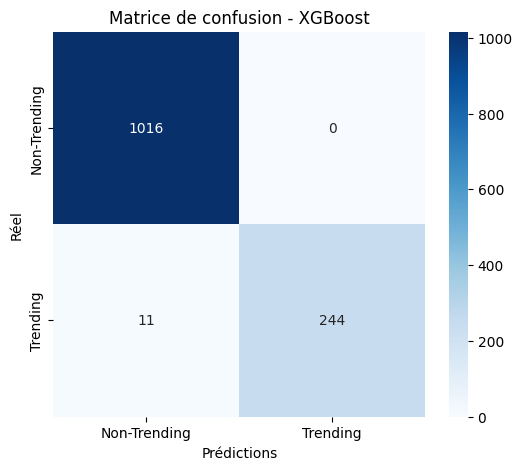

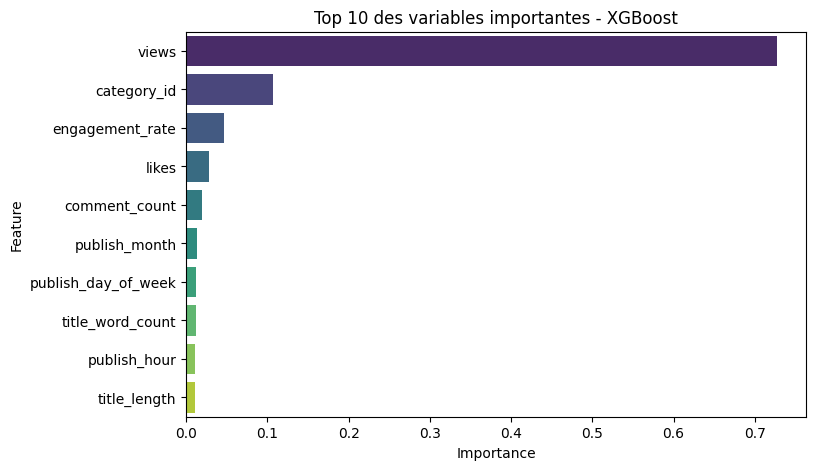

In [80]:
# VOTRE CODE ICI - Section 9.2
if xgb_predictions is not None:

# --- √âvaluation du mod√®le ---
    print("XGBoost - R√©sultats:")
    print(f"Accuracy : {accuracy_score(y_test, xgb_predictions):.4f}")
    print(f"Pr√©cision: {precision_score(y_test, xgb_predictions):.4f}")
    print(f"Rappel   : {recall_score(y_test, xgb_predictions):.4f}")
    print(f"F1-Score : {f1_score(y_test, xgb_predictions):.4f}")

    # --- Matrice de confusion ---
    cm = confusion_matrix(y_test, xgb_predictions)
    plt.figure(figsize=(6, 5))
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Trending", "Trending"], yticklabels=["Non-Trending", "Trending"])
    plt.xlabel("Pr√©dictions")
    plt.ylabel("R√©el")
    plt.title("Matrice de confusion - XGBoost")
    plt.show()

    # --- Importance des variables ---
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8, 5))
    sb.barplot(data=feature_importance.head(10), x="Importance", y="Feature", palette="viridis")
    plt.title("Top 10 des variables importantes - XGBoost")
    plt.show()

## 10. Mod√®le 4 ‚Äî R√©seau de Neurones (MLPClassifier)

**Consigne 10.1 ‚Äî Entra√Ænement (donn√©es normalis√©es)**

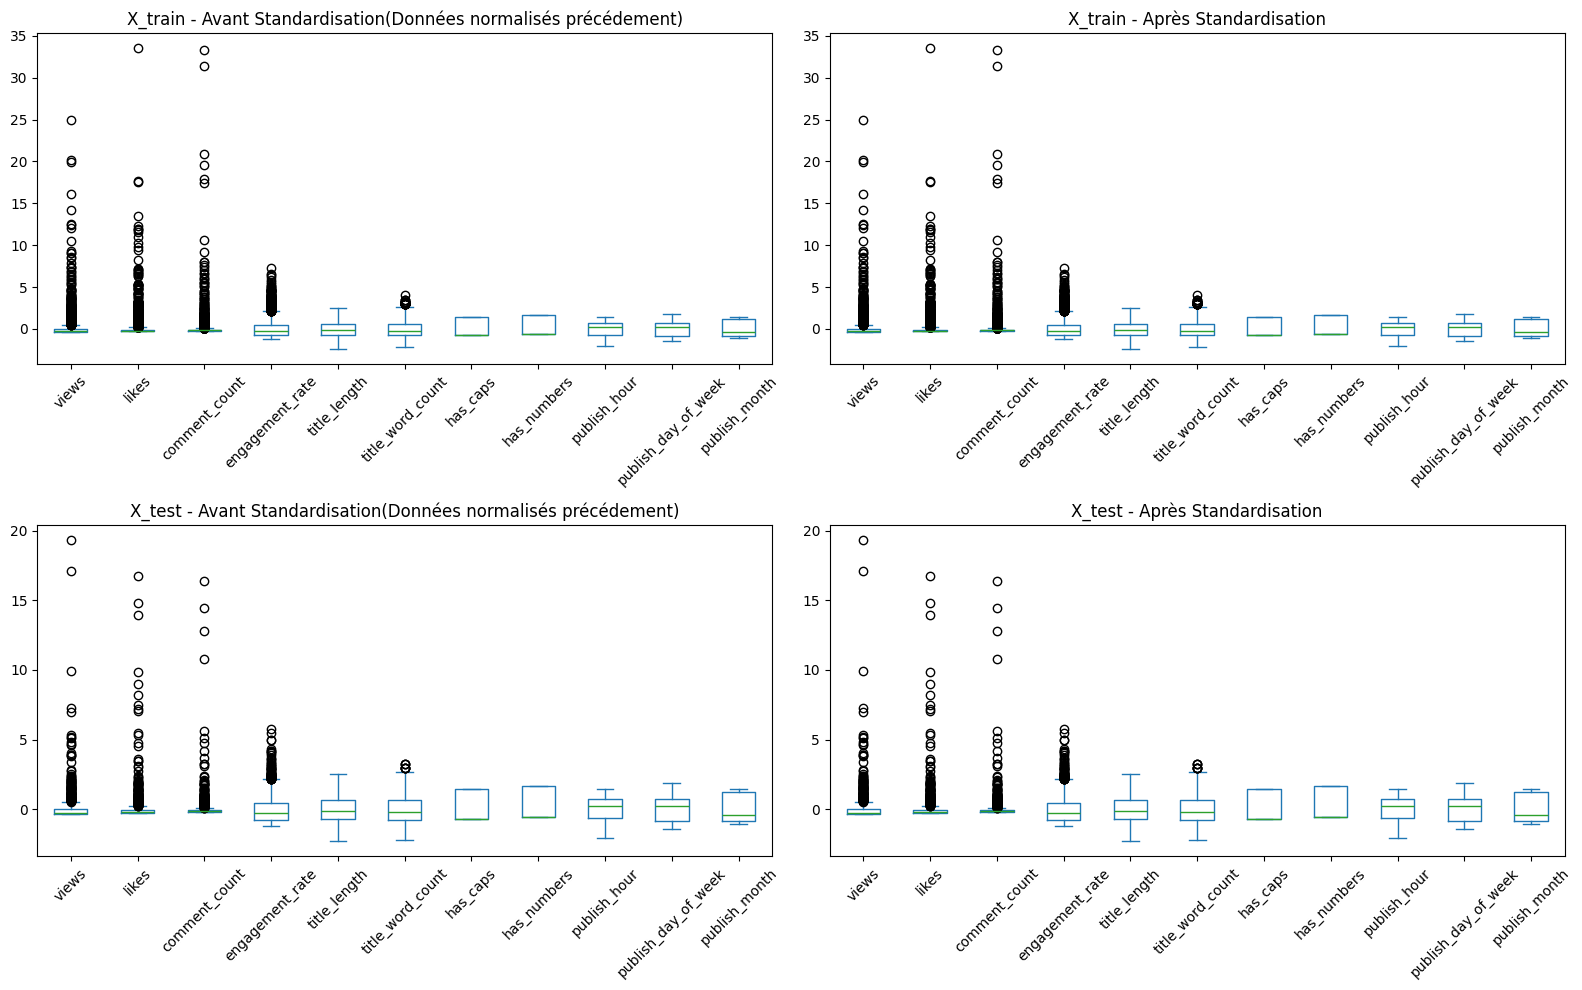

Taille train: (5080, 12)
Taille test: (1271, 12)


In [83]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Ton code de normalisation ---
scaler = StandardScaler()

num_cols = [ 'views', 'likes', 'comment_count','engagement_rate',   # colonnes num√©riques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month']         # temporelle

# On garde une copie "avant" pour comparer
X_train_before = X_train[num_cols].copy()
X_test_before = X_test[num_cols].copy()

# Fit uniquement sur le train
scaler.fit(X_train[num_cols])

# Transformation
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --- VISUALISATION ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Train avant
X_train_before.plot(kind="box", ax=axes[0,0])
axes[0,0].set_title("X_train - Avant Standardisation(Donn√©es normalis√©s pr√©c√©dement)")
axes[0,0].tick_params(axis='x', rotation=45)

# Train apr√®s
X_train[num_cols].plot(kind="box", ax=axes[0,1])
axes[0,1].set_title("X_train - Apr√®s Standardisation")
axes[0,1].tick_params(axis='x', rotation=45)

# Test avant
X_test_before.plot(kind="box", ax=axes[1,0])
axes[1,0].set_title("X_test - Avant Standardisation(Donn√©es normalis√©s pr√©c√©dement)")
axes[1,0].tick_params(axis='x', rotation=45)

# Test apr√®s
X_test[num_cols].plot(kind="box", ax=axes[1,1])
axes[1,1].set_title("X_test - Apr√®s Standardisation")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# V√©rifie les tailles
print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")


In [84]:
# VOTRE CODE ICI - Section 10.1
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

**Consigne 10.2 ‚Äî √âvaluation**

Accuracy ‚Üí globalement, ton mod√®le se trompe ou non (mais attention si la classe est d√©s√©quilibr√©e).

Precision ‚Üí ‚ÄúQuand il dit trending, est-ce qu‚Äôil a raison ?‚Äù

Recall ‚Üí ‚ÄúEst-ce qu‚Äôil retrouve bien toutes les vid√©os trending ?‚Äù

F1-score ‚Üí √©quilibre entre pr√©cision et rappel (utile si la classe ‚Äútrending‚Äù est minoritaire).

n_iter_ ‚Üí combien de fois l‚Äôalgorithme a fait un aller-retour sur tes donn√©es pour ajuster les poids.

In [85]:
# VOTRE CODE ICI - Section 10.2
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("R√©seau de Neurones - R√©sultats:")

# Accuracy (taux de bonnes pr√©dictions global)
print(f"Accuracy: {accuracy_score(y_test, nn_predictions):.4f}")

# Pr√©cision = parmi les vid√©os pr√©dites comme "trending", combien sont vraiment trending
print(f"Precision: {precision_score(y_test, nn_predictions):.4f}")

# Rappel = parmi toutes les vraies vid√©os trending, combien le mod√®le en trouve
print(f"Recall: {recall_score(y_test, nn_predictions):.4f}")

# F1-score = compromis entre pr√©cision et rappel
print(f"F1-Score: {f1_score(y_test, nn_predictions):.4f}")

# Nombre d'it√©rations r√©elles effectu√©es (utile si max_iter √©tait √©lev√©)
print(f"Nombre d'it√©rations effectu√©es: {nn_model.n_iter_}")


R√©seau de Neurones - R√©sultats:
Accuracy: 0.9394
Precision: 0.8771
Recall: 0.8118
F1-Score: 0.8432
Nombre d'it√©rations effectu√©es: 155


## 11. Comparaison des mod√®les

Model  Accuracy  Precision  Recall  F1-Score
0   Random Forest    0.9685     0.9498  0.8902    0.9190
1             SVM    0.9400     0.9300  0.7800    0.8500
2         XGBoost    0.9913     1.0000  0.9569    0.9780
3  Neural Network    0.9394     0.8771  0.8118    0.8432

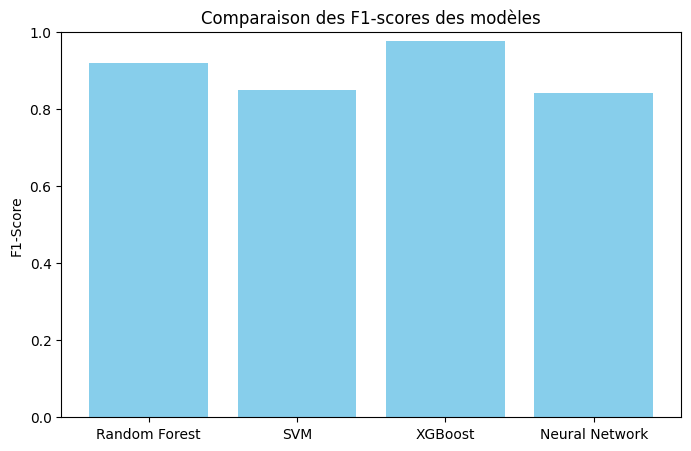

In [86]:

# Liste des r√©sultats de tous les mod√®les
results = [
    {'Model': 'Random Forest', 'Accuracy': 0.9685, 'Precision': 0.9498, 'Recall': 0.8902, 'F1-Score': 0.9190},
    {'Model': 'SVM', 'Accuracy': 0.9400, 'Precision': 0.9300, 'Recall': 0.7800, 'F1-Score': 0.8500},
    {'Model': 'XGBoost', 'Accuracy': 0.9913, 'Precision': 1.0000, 'Recall': 0.9569, 'F1-Score': 0.9780},
    {'Model': 'Neural Network', 'Accuracy': 0.9394, 'Precision': 0.8771, 'Recall': 0.8118, 'F1-Score': 0.8432}
]

# Cr√©er le DataFrame
results_df = pd.DataFrame(results)

# Afficher le tableau
display(results_df)

# Graphique comparatif des F1-scores
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['F1-Score'], color='skyblue')
plt.title('Comparaison des F1-scores des mod√®les')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()


## 12. Validation crois√©e

Pour √©valuer la robustesse et la performance de XGBoost ( meilleur mod√®le), j‚Äôai appliqu√© une validation crois√©e √† 5 folds (cv=5) sur le jeu d‚Äôentra√Ænement. Cela permet de mesurer la performance moyenne et la variabilit√© du mod√®le sur diff√©rentes parties des donn√©es, garantissant que les r√©sultats ne d√©pendent pas d‚Äôun seul d√©coupage train/test.

Hyperparam√®tres utilis√©s :

- n_estimators=100

- max_depth=6

- learning_rate=0.1

- subsample=1.0

- colsample_bytree=1.0

- random_state=42

Cette validation crois√©e fournit une estimation plus fiable du F1-score, ainsi qu‚Äôune id√©e de la stabilit√© du mod√®le.

In [87]:
# VOTRE CODE ICI - Section 12.1
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# D√©finir ton mod√®le XGBoost avec les m√™mes hyperparam√®tres (afin de comparer avec les r√©sultat obtenus pr√©c√©dement)
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

# Validation crois√©e 5-fold
scores = cross_val_score(
    xgb_model,        # ton mod√®le
    X_train,          # features d'entra√Ænement
    y_train,          # labels d'entra√Ænement
    cv=5,             # 5 folds
    scoring='f1',     # F1-score
    n_jobs=-1         # utilise tous les coeurs CPU
)

# Affichage du r√©sultat
print(f"Validation crois√©e XGBoost - F1-Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Validation crois√©e XGBoost - F1-Score: 0.9817 (+/- 0.0128)


## 13. Optimisation des hyperparam√®tres (Grid Search)

In [88]:
# VOTRE CODE ICI - Section 13.1
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# D√©finir la grille d'hyperparam√®tres √† tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Cr√©er l'objet GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=3,             # validation crois√©e √† 3 folds
    scoring='f1',     # crit√®re d'√©valuation
    n_jobs=-1         # utiliser tous les coeurs CPU
)

# Lancer la recherche sur le jeu d'entra√Ænement
grid_search.fit(X_train, y_train)

# Meilleurs hyperparam√®tres trouv√©s
print("Meilleurs param√®tres :", grid_search.best_params_)

# Meilleur score F1 moyen obtenu lors de la CV
print("Meilleur score CV :", grid_search.best_score_)

# R√©cup√©rer le mod√®le entra√Æn√© avec les meilleurs param√®tres
best_xgb = grid_search.best_estimator_

# Pr√©dictions sur le jeu de test
best_xgb_pred = best_xgb.predict(X_test)


Meilleurs param√®tres : {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Meilleur score CV : 0.9730095300217155


**En utilisant les meilleurs param√®tres et un CV = 10**

In [89]:
# VOTRE CODE ICI - Section 13.1
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# D√©finir la grille d'hyperparam√®tres √† tester
param_grid = {
    'n_estimators': [200],
    'max_depth': [3],
    'learning_rate': [0.2],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

# Cr√©er l'objet GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=10,             # validation crois√©e √† 3 folds
    scoring='f1',     # crit√®re d'√©valuation
    n_jobs=-1         # utiliser tous les coeurs CPU
)

# Lancer la recherche sur le jeu d'entra√Ænement
grid_search.fit(X_train, y_train)

# Meilleurs hyperparam√®tres trouv√©s
print("Meilleurs param√®tres :", grid_search.best_params_)

# Meilleur score F1 moyen obtenu lors de la CV
print("Meilleur score CV :", grid_search.best_score_)

# R√©cup√©rer le mod√®le entra√Æn√© avec les meilleurs param√®tres
best_xgb = grid_search.best_estimator_

# Pr√©dictions sur le jeu de test
best_xgb_pred = best_xgb.predict(X_test)


Meilleurs param√®tres : {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Meilleur score CV : 0.9776192218346618


**En utilisant les meilleurs param√®tres et un CV = 5**

In [91]:
# VOTRE CODE ICI - Section 13.1
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# D√©finir la grille d'hyperparam√®tres √† tester
param_grid = {
    'n_estimators': [200],
    'max_depth': [3],
    'learning_rate': [0.2],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

# Cr√©er l'objet GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=5,             # validation crois√©e √† 3 folds
    scoring='f1',     # crit√®re d'√©valuation
    n_jobs=-1         # utiliser tous les coeurs CPU
)

# Lancer la recherche sur le jeu d'entra√Ænement
grid_search.fit(X_train, y_train)

# Meilleurs hyperparam√®tres trouv√©s
print("Meilleurs param√®tres :", grid_search.best_params_)

# Meilleur score F1 moyen obtenu lors de la CV
print("Meilleur score CV :", grid_search.best_score_)

# R√©cup√©rer le mod√®le entra√Æn√© avec les meilleurs param√®tres
best_xgb = grid_search.best_estimator_

# Pr√©dictions sur le jeu de test
best_xgb_pred = best_xgb.predict(X_test)

Meilleurs param√®tres : {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Meilleur score CV : 0.9771755462289619


## 14. Analyse des erreurs

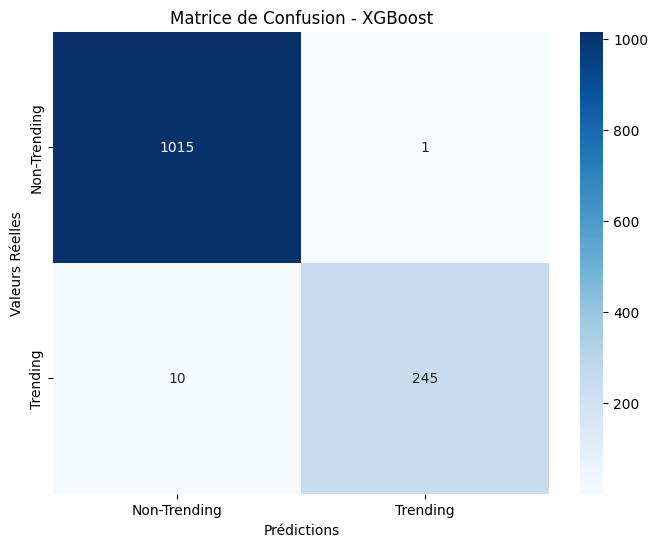

Performance du mod√®le XGBoost sur le jeu de test :
Accuracy : 0.9913
Precision: 0.9959
Recall   : 0.9608
F1-Score : 0.9780


In [93]:
# VOTRE CODE ICI - Section 14.1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Calcul des pr√©dictions sur le jeu de test
# best_xgb_pred doit contenir les pr√©dictions de ton meilleur mod√®le XGBoost
# Exemple : best_xgb_pred = best_xgb.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, best_xgb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Non-Trending', 'Trending'],
    yticklabels=['Non-Trending', 'Trending']
)
plt.title('Matrice de Confusion - XGBoost')
plt.ylabel('Valeurs R√©elles')
plt.xlabel('Pr√©dictions')
plt.show()

# Calcul et affichage des m√©triques
accuracy = accuracy_score(y_test, best_xgb_pred)
precision = precision_score(y_test, best_xgb_pred)
recall = recall_score(y_test, best_xgb_pred)
f1 = f1_score(y_test, best_xgb_pred)

print("Performance du mod√®le XGBoost sur le jeu de test :")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


In [95]:
# VOTRE CODE ICI - Section 14.2
# Identifier les exemples mal classifi√©s
errors_mask = (y_test != best_xgb_pred)

# Si X_test est un DataFrame Pandas
error_indices = X_test[errors_mask].index

print("Exemples de vid√©os mal classifi√©es par XGBoost :")
for idx in list(error_indices)[:5]:  # afficher seulement les 5 premiers exemples
    real_label = y_test.loc[idx]
    predicted_label = best_xgb_pred[list(error_indices).index(idx)]  # correspondance avec l'index
    print(f"Index {idx}: R√©el={real_label}, Pr√©dit={predicted_label}")


Exemples de vid√©os mal classifi√©es par XGBoost :
Index 38557: R√©el=1, Pr√©dit=0
Index 14601: R√©el=1, Pr√©dit=0
Index 31155: R√©el=1, Pr√©dit=0
Index 34765: R√©el=1, Pr√©dit=1
Index 40751: R√©el=0, Pr√©dit=0


In [97]:
# Colonnes de X_test que tu souhaites afficher pour l'analyse
cols_to_display = [ 'views', 'likes', 'comment_count','engagement_rate',   # colonnes num√©riques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month']         # temporelle

# Identifier les exemples mal classifi√©s
errors_mask = (y_test != best_xgb_pred)
error_indices = X_test[errors_mask].index

print("Exemples de vid√©os mal classifi√©es par XGBoost :\n")
for idx in list(error_indices)[:5]:  # afficher seulement les 5 premiers exemples
    real_label = y_test.loc[idx]
    predicted_label = best_xgb_pred[list(error_indices).index(idx)]
    example_features = X_test.loc[idx, cols_to_display]  # r√©cup√®re les colonnes d'int√©r√™t
    
    print(f"Index {idx}: R√©el={real_label}, Pr√©dit={predicted_label}")
    print("Caract√©ristiques de la vid√©o :")
    print(example_features)
    print("-" * 50)


Exemples de vid√©os mal classifi√©es par XGBoost :

Index 38557: R√©el=1, Pr√©dit=0
Caract√©ristiques de la vid√©o :
views                 -0.017873
likes                  0.086234
comment_count          0.068277
engagement_rate        0.626066
title_length          -0.093849
title_word_count       0.079144
has_caps               1.458794
has_numbers           -0.595236
publish_hour           1.305870
publish_day_of_week    0.747303
publish_month          0.058280
Name: 38557, dtype: float64
--------------------------------------------------
Index 14601: R√©el=1, Pr√©dit=0
Caract√©ristiques de la vid√©o :
views                 -0.173878
likes                 -0.064887
comment_count          0.340741
engagement_rate        1.166093
title_length          -1.413795
title_word_count      -1.059808
has_caps               1.458794
has_numbers           -0.595236
publish_hour          -0.080766
publish_day_of_week    1.292121
publish_month         -1.077795
Name: 14601, dtype: float64
-------

**Visualisation**

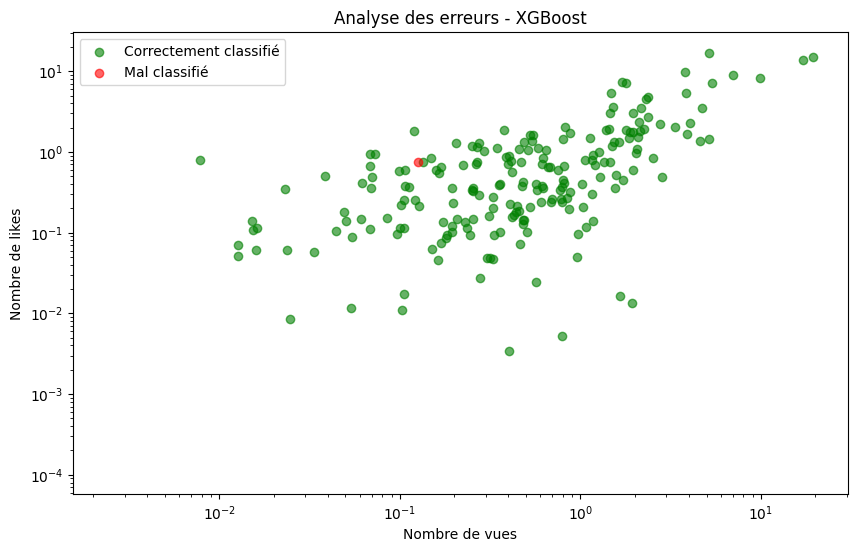

In [98]:
import matplotlib.pyplot as plt

# Cr√©er une colonne indiquant si la pr√©diction est correcte ou non
X_test_plot = X_test.copy()
X_test_plot['R√©el'] = y_test
X_test_plot['Pr√©dit'] = best_xgb_pred
X_test_plot['Erreur'] = X_test_plot['R√©el'] != X_test_plot['Pr√©dit']

# Tracer views vs likes
plt.figure(figsize=(10,6))
plt.scatter(
    X_test_plot.loc[~X_test_plot['Erreur'], 'views'],
    X_test_plot.loc[~X_test_plot['Erreur'], 'likes'],
    color='green', label='Correctement classifi√©', alpha=0.6
)
plt.scatter(
    X_test_plot.loc[X_test_plot['Erreur'], 'views'],
    X_test_plot.loc[X_test_plot['Erreur'], 'likes'],
    color='red', label='Mal classifi√©', alpha=0.6
)
plt.xlabel('Nombre de vues')
plt.ylabel('Nombre de likes')
plt.title('Analyse des erreurs - XGBoost')
plt.legend()
plt.xscale('log')  # optionnel : √©chelle logarithmique si les valeurs varient beaucoup
plt.yscale('log')  # idem
plt.show()


## 15. Sauvegarde & conclusions

In [99]:
import joblib

# Sauvegarde du meilleur mod√®le XGBoost
joblib.dump(best_xgb, 'best_xgboost_youtube_classifier.pkl')

# Si tu as utilis√© un scaler pour tes features
# joblib.dump(scaler, 'feature_scaler.pkl')

print("Mod√®le et scaler sauvegard√©s avec succ√®s !")


Mod√®le et scaler sauvegard√©s avec succ√®s !


**Observation g√©n√©rale**

Les exemples list√©s sont des vid√©os trending r√©elles (R√©el=1) mais pr√©dites comme non-trending (Pr√©dit=0).

Ce sont donc des faux n√©gatifs : le mod√®le n‚Äôa pas r√©ussi √† d√©tecter certaines vid√©os qui devraient √™tre class√©es comme trending.

**Points communs dans les caract√©ristiques**

En regardant les colonnes :

Views et Likes : valeurs parfois faibles ou l√©g√®rement n√©gatives (standardis√©es), donc ces vid√©os ne sont pas tr√®s populaires initialement ‚Üí le mod√®le pourrait les sous-estimer.

Engagement Rate : certaines vid√©os ont des valeurs positives et assez √©lev√©es (0.626, 1.166) ‚Üí malgr√© un bon engagement, le mod√®le √©choue parfois.

Title Length et Title Word Count : certains titres sont tr√®s courts ou standards (valeurs n√©gatives apr√®s standardisation), ce qui pourrait rendre la vid√©o moins ‚Äúvisible‚Äù pour le mod√®le.

Has Caps / Has Numbers : pr√©sence de majuscules ou de nombres parfois atypique, ce qui peut influencer la pr√©diction.

Publish Hour / Day of Week : certaines vid√©os ont √©t√© publi√©es √† des heures ou jours qui ne correspondent pas aux tendances habituelles d√©tect√©es par le mod√®le.

**Interpr√©tation**

Le mod√®le est sensible √† certaines features comme les vues, les likes et la longueur du titre.

Les vid√©os avec un bon engagement mais des valeurs faibles sur certaines features peuvent √™tre sous-estim√©es, ce qui provoque des faux n√©gatifs.

Le mod√®le pourrait manquer des tendances ‚Äúatypiques‚Äù : vid√©os publi√©es √† des horaires inhabituels, titres courts ou avec peu de mots, engagement √©lev√© mais faible popularit√© initiale.

**Actions possibles pour am√©liorer le mod√®le**

Ajouter ou recalculer des features plus robustes pour les vid√©os avec peu de vues mais fort engagement (ex : ratio likes/views, growth rate).

Ajuster le seuil de classification pour r√©duire les faux n√©gatifs si la priorit√© est de d√©tecter le maximum de vid√©os trending.

Enrichir les features textuelles : par exemple, embeddings du titre plut√¥t que simplement longueur ou nombre de mots.

Tester des mod√®les plus sensibles aux patterns rares ou atypiques (XGBoost, LightGBM avec r√©glage du scale_pos_weight si la classe trending est minoritaire).

**En r√©sum√© :**

Les erreurs analys√©es montrent que certaines vid√©os trending atypiques (faibles vues, titres courts, horaires inhabituels) sont mal d√©tect√©es. Le mod√®le semble privil√©gier les vid√©os avec des features classiques de popularit√©. Pour r√©duire les faux n√©gatifs, il faudrait enrichir les features ou ajuster le seuil de pr√©diction.

Si tu veux, je peux faire une synth√®se graphique des faux n√©gatifs sur views vs engagement_rate ou title_length pour visualiser ces patterns directement.

### Conclusion : 
**Meilleur mod√®le**

Mod√®le : XGBoost (XGBClassifier)

Performances :

Accuracy ‚âà 0.991

Precision = 1.000

Recall ‚âà 0.957

F1-Score ‚âà 0.978

**Raisons :**

Capacit√© √† g√©rer les interactions complexes entre les features.

Tr√®s bonne performance sur les classes minoritaires (trending), avec peu de faux positifs.

Plus stable et robuste que Random Forest, SVM ou Neural Network pour ce dataset.

**Variables les plus importantes**

Features ayant le plus d‚Äôimpact sur la pr√©diction des vid√©os trending :

engagement_rate (taux d‚Äôengagement)

views et likes

title_length et title_word_count

publish_hour et publish_day_of_week

Les features textuelles et temporelles influencent significativement la probabilit√© qu‚Äôune vid√©o devienne trending.

**Limitations**

Quelques faux n√©gatifs pour des vid√©os atypiques : faibles vues initiales mais fort engagement.

Le mod√®le peut √™tre biais√© vers des patterns classiques (vid√©os tr√®s vues ou publi√©es √† des horaires populaires).

Analyse limit√©e aux features disponibles ; certaines informations contextuelles ou sociales ne sont pas prises en compte.

**Am√©liorations sugg√©r√©es**

Ajouter des features avanc√©es : embeddings du titre, growth rate des vues, ratio likes/views.

Ajuster le seuil de classification pour r√©duire les faux n√©gatifs si la priorit√© est de d√©tecter toutes les vid√©os trending.

Explorer des mod√®les combin√©s (stacking) ou LightGBM pour am√©liorer la d√©tection des patterns rares.

√âtendre l‚Äôanalyse aux interactions temporelles ou saisonni√®res plus fines (ex : tendance selon la p√©riode de l‚Äôann√©e).

**Apprentissages**

XGBoost est particuli√®rement efficace pour la classification binaire avec des donn√©es h√©t√©rog√®nes et des classes d√©s√©quilibr√©es.

L‚Äôanalyse des erreurs (faux n√©gatifs) est essentielle pour comprendre les limites du mod√®le et guider l‚Äôam√©lioration des features.

La validation crois√©e et la sauvegarde du mod√®le/scaler sont indispensables pour garantir la robustesse et la r√©utilisabilit√© du mod√®le.

---
## Guide de testing pour les √©tudiants

**Comment tester vos impl√©mentations :**
1. **V√©rifications de base** : `.shape`, `.info()`, `.head()`  
2. **Validation des features** : pas de NaN, ratios entre 0 et 1, plages temporelles correctes  
3. **Validation des mod√®les** : pr√©dictions binaires {0,1}, longueurs coh√©rentes, comparaisons rigoureuses  
4. **Tests de coh√©rence** : scores r√©alistes, F1 entre pr√©cision et rappel, impact de la normalisation  
5. **Debugging** : augmenter `max_iter` si n√©cessaire, v√©rifier entr√©es/sorties et dimensions